# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Copyright statement: 
#### <span style='font-family:"Times New Roman"'>The initial code was provided by Dr. Sandoval (Assitant professor of Electrical Engineering, New Mexico State University) as a starting point for project. https://web.nmsu.edu/~spsandov/ 
#### <span style='font-family:"Times New Roman"'>The algorithm in current form is developed by Sina Zamen. 

# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'>In this problem, application of multi-layer perceptron with one hidden layer and 10 neurons for classifying Double Moon Dataset is considered.  

### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
from scipy.special import gammainc
import matplotlib.pyplot as plt
from numpy.linalg import norm
from matplotlib import style
import pandas as pd
import numpy.matlib
import numpy as np
import matplotlib
import math
plt.style.use('ggplot')
label = [-1,1]

### <span style='font-family:"Times New Roman"'>Defining Functions:

In [2]:
def trainMLP(X,D,H,eta,alpha,epochMax,MSETarget):
    '''%==========================================================================
    % Call Syntax:  [Wh,Wo,MSE] = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)
    %
    % Description:  The matrix implementation of the Backpropagation algorithm
    %               for a Multilayer Perceptron (MLP).
    %
    % Input Arguments:
    %	Name: X
    %	Type: (p x N) dimensional matrix, where p is a number of the inputs and N is a training size
    %	Description: a series of input oberservation vectors as columns in a matrix
    %
    %	Name: D
    %	Type: (m x N) dimensional matrix, where m is a number of the output neurons and N is a training size
    %	Description: a series of desired output responses as columns in a matrix
    %
    %	Name: H
    %	Type: vector
    %	Description: Number of hidden neurons in each hidden layer
    %
    %	Name: eta
    %	Type: scalar
    %	Description: learning rate parameter
    %
    %	Name: alpha
    %	Type: scalar
    %	Description: momentum parameter
    %
    %	Name: epochMax
    %	Type:  scalar
    %	Description: maximum number of training epochs
    %
    %	Name: MSETarget (optional)
    %	Type:  scalar (default: MSETarget = 1e-12)
    %	Description: target mse error rate
    %
    % Output Arguments:
    %	Name: Wh
    %	Type: Cell arrray, with each cell containing a (H(j) x p+1) dimensional matrix, where H(j) is the number of neurons in the j'th hidden layer
    %	Description: hidden layer weight matrix for each hidden layer
    %
    %	Name: Wo
    %	Type: (m x H(end)+1) dimensional matrix
    %	Description: Output layer weight matrix
    %
    %	Name: MSE
    %	Type: vector
    %	Description: mean square error per epoch
    %
    %--------------------------------------------------------------------------
    % Notes:
    %
    % References:
    % [1] - S. Haykin, Neural Networks and Learning Machines, vol. 3, Pearson,2009
    %
    %--------------------------------------------------------------------------
    % Author: Steven Sandoval
    %--------------------------------------------------------------------------
    % Revision History:
    %
    %          Steven Sandoval - 25 September 2012 - Adapted 2-layer MLP codes by Marcelo Augusto Costa Fernandes (mfernandes@dca.ufrn.br).
    %          Steven Sandoval -   06 October 2012 - Cleaned code, added comments
    %          Steven Sandoval -      01 July 2018 - updated references and variable names, added ReLU activation function
    %          Steven Sandoval -   30 October 2019 - simplified code for EE565 Project
    %          Brandon Byford  -   30 OCtober 2019 - ported to python3 
    %==========================================================================
    ''';
    
    '''%-----------
    %INITIALIZE
    %-----------''';
    
    a = 1.7159
    b = 2/3.
    [p, N] = np.shape(np.array(X))                 #dimension of input vector and number of training data pts
    m = len(D)                                  #number of output neurons
    bias = -1                                      #bias value
    Wh=[]
    WhAnt=[]
    X = np.concatenate([bias*np.ones([1,N]),X ],axis=0)                  #add zero'th order terms
    for j in range(len(H)):
        if j ==0:
            Wh.append(np.random.rand(H[j],p+1))                          #initialize first hidden layer weights
            WhAnt.append(np.zeros([H[j],p+1]))                      #initialize variable for weight correction using momentum 
        else:
            Wh.append( np.random.rand(H[j],H[j-1]+1)  ) #initialize hidden layer weights
            WhAnt.append(np.zeros([H[j],H[j-1]+1]) )                #initialize variable for weight correction using momentum 
            
    Wo = np.random.rand(m,H[-1]+1)                                 #initialize output layer weights
    WoAnt = np.zeros([m,H[-1]+1])                            #initialize variable for weight correction using momentum
    MSETemp = np.zeros([epochMax,1])                   #allocate memory for MSE error for each epoch

    for i in range(epochMax):
        O=[]
        '''%-------------------------------------------------
        %PROPAGATE INPUTS FORWARD
        %-------------------------------------------------''';
        
        '''%------------------------
        %HIDDEN LAYER
        %------------------------''';
        for j in range(len(H)):               #%loop over each hidden layer
            if j==0:
                V = Wh[j]@X               #%weighted sum of inputs [1] Eqn(4.29/30)
            else:
                V = Wh[j]@O[j-1]          #%weighted sum of hidden inputs [1] Eqn(4.29/31)
            PHI = a * np.tanh(b*V)         #%activation function [1] Eqn(4.37)
            O.append(np.concatenate([bias*np.ones([1,N]),PHI],axis=0))   #%add zero'th order terms
        
        '''%------------------------
        %OUTPUT LAYER
        %------------------------''';
        V = Wo@O[-1]                 #%weighted sum of inputs [1] Eqn(4.29)
        Y = a * np.tanh(b*V)       #%activation function [1] Eqn(4.37)


        '''%------------------------
        %ERROR CALCULATION 
        %------------------------''';
        E = D - Y                  #%calclate error
        mse = np.mean(E**2)    #%calculate mean square error
        
        MSETemp[i,0] = mse           #%save mse

        #%DISPLAY PROGRESS, BREAK IF ERROR CONSTRAINT MET
        print('epoch = ' +str(i)+ ' mse = ' +str(mse))
        if (mse < MSETarget):
            MSE = MSETemp
            return(Wh,Wo,MSE)
        
        '''%-------------------------------------------------
        %BACK PROPAGATE ERROR
        %-------------------------------------------------

        %------------------------
        %OUTPUT LAYER
        %------------------------''';
        PHI_PRMo = b/a *(a-Y)*(a+Y)   #%derivative of activation function [1] Eqn(4.38)

        dGo = E * PHI_PRMo                 #%local gradient [1] Eqn(4.35/39)
        DWo = dGo@O[-1].T                    #%non-scaled weight correction [1] Eqn(4.27)

        Wo = Wo + eta*DWo + alpha*WoAnt  #%weight correction including momentum term [1] Eqn(4.41)
        WoAnt = eta*DWo + alpha*WoAnt                         #%save weight correction for momentum calculation

        '''%------------------------
        %HIDDEN LAYERS
        %------------------------''';
        
        
        for j in np.arange(len(H))[::-1]:
            PHI_PRMh = b/a *(a-O[j])*(a+O[j])         #%derivative of activation function [1] Eqn(4.38)
            
            if j==(len(H)-1):
                dGh = PHI_PRMh * (Wo.T @ dGo)                   #%local gradient[1] Eqn(4.36/40)
            else:
                dGh = PHI_PRMh * (Wh[j+1].T @ np.matlib.repmat( dGo,Wh[j+1].shape[0],1 ) )         # %local gradient[1] Eqn(4.36/40)
            dGh = dGh[1:,:]                             #%dicard first row of local gradient (bias doesn't update)
            
            if j==0:
                DWh = dGh@X.T                            #%non-scaled weight correction [1] Eqn(4.27/30)
            else:
                DWh = dGh@O[j-1].T                       #%non-scaled weight correction [1] Eqn(4.27/31)
            
            Wh[j] =Wh[j]+ eta*DWh + alpha*WhAnt[j]  # %weight correction including momentum term [1] Eqn(4.41)
            WhAnt[j] =eta*DWh + alpha*WhAnt[j]     #%save weight correction for momentum calculation

    MSE = MSETemp
    return(Wh,Wo,MSE)

In [3]:
def MLP(X,Wh,Wo):
    '''%-----------
    %INITIALIZE
    %-----------''';
    a = 1.7159
    b = 2/3.
    N = len(X[0,:])               #%number of training data pts
    bias = -1                  # %initial bias value
    O=[]
    X = np.concatenate((bias*np.ones([1,N]) , X),axis=0)    #%add zero'th order terms
    H=[]
    for j in range(len(Wh)):
        H.append(len(Wh[j]))
    
    
    '''
    %-----
    %MAIN
    %-----

    %-------------------------------------------------
    %PROPAGATE INPUTS FORWARD
    %-------------------------------------------------
    %------------------------
    %HIDDEN LAYER
    %------------------------''';
    
    for j in range(len(H)):               #%loop over each hidden layer
        if j==0:
            V = Wh[j]@X               #%weighted sum of inputs [1] Eqn(4.29/30)
        else:
            V = Wh[j]@O[j-1]          #%weighted sum of hidden inputs [1] Eqn(4.29/31)
        
        PHI = a * np.tanh(b*V)     #%acivation function [1] Eqn(4.37)
        O.append( np.concatenate((bias*np.ones([1,N]),PHI),axis=0))   #%add zero'th order terms
    

    '''%------------------------
    %OUTPUT LAYER
    %------------------------''';
    V = Wo@O[-1]            #%weighted sum of inputs [1] Eqn(4.29)
    Y = a * np.tanh(b*V)    #%activation function [1] Eqn(4.37)

    return Y

In [4]:
def sample_ring(center,r1,r2,n_points):
    nd = center.size
    x = np.random.normal(size=(n_points, nd))
    sq = np.sum(x**2,axis=1)
    z = (r2-r1)/r2
    fr = (r2-r1)*gammainc(nd/2**z,sq/2**z)**(1/nd)/np.sqrt(sq) + r1/np.sqrt(sq)
    frtiled = np.tile(fr.reshape(n_points,1),(1,nd))
    p = center + np.multiply(x,frtiled)
    return p

In [5]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [6]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh1,Wo1,MSE1 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.7276875250786055
epoch = 1 mse = 2.6966892919136356
epoch = 2 mse = 2.664946793096477
epoch = 3 mse = 2.632433095434239
epoch = 4 mse = 2.5991276250679576
epoch = 5 mse = 2.565024686936914
epoch = 6 mse = 2.530135822284555
epoch = 7 mse = 2.494491781310234
epoch = 8 mse = 2.458143830891083
epoch = 9 mse = 2.4211641041172736
epoch = 10 mse = 2.3836447380910784
epoch = 11 mse = 2.3456956482296074
epoch = 12 mse = 2.307440946348327
epoch = 13 mse = 2.269014201474162
epoch = 14 mse = 2.2305529250988823
epoch = 15 mse = 2.1921927896824958
epoch = 16 mse = 2.1540621256701526
epoch = 17 mse = 2.116277179140355
epoch = 18 mse = 2.0789384702361042
epoch = 19 mse = 2.0421284131316657
epoch = 20 mse = 2.0059101866116222
epoch = 21 mse = 1.9703277137199595
epoch = 22 mse = 1.935406533398628
epoch = 23 mse = 1.9011553230266243
epoch = 24 mse = 1.8675678444347754
epoch = 25 mse = 1.8346251209950064
epoch = 26 mse = 1.802297696229139
epoch = 27 mse = 1.7705478662349268
epoch = 28 ms

epoch = 352 mse = 0.3087804041436784
epoch = 353 mse = 0.30846305704253757
epoch = 354 mse = 0.3081506939800353
epoch = 355 mse = 0.3078432577628103
epoch = 356 mse = 0.3075406910300835
epoch = 357 mse = 0.3072429362823057
epoch = 358 mse = 0.30694993590924474
epoch = 359 mse = 0.30666163221750004
epoch = 360 mse = 0.30637796745743195
epoch = 361 mse = 0.3060988838494977
epoch = 362 mse = 0.30582432360998413
epoch = 363 mse = 0.30555422897612927
epoch = 364 mse = 0.3052885422306264
epoch = 365 mse = 0.3050272057255035
epoch = 366 mse = 0.30477016190537454
epoch = 367 mse = 0.304517353330057
epoch = 368 mse = 0.3042687226965533
epoch = 369 mse = 0.3040242128603939
epoch = 370 mse = 0.3037837668563394
epoch = 371 mse = 0.30354732791844247
epoch = 372 mse = 0.30331483949946847
epoch = 373 mse = 0.3030862452896761
epoch = 374 mse = 0.3028614892349598
epoch = 375 mse = 0.3026405155543562
epoch = 376 mse = 0.3024232687569166
epoch = 377 mse = 0.3022096936579508
epoch = 378 mse = 0.3019997353

epoch = 622 mse = 0.28755014031172593
epoch = 623 mse = 0.28752414031047263
epoch = 624 mse = 0.2874981433877936
epoch = 625 mse = 0.28747214917662806
epoch = 626 mse = 0.28744615731825707
epoch = 627 mse = 0.28742016746209487
epoch = 628 mse = 0.2873941792654862
epoch = 629 mse = 0.2873681923935082
epoch = 630 mse = 0.28734220651877723
epoch = 631 mse = 0.2873162213212603
epoch = 632 mse = 0.28729023648809154
epoch = 633 mse = 0.28726425171339304
epoch = 634 mse = 0.28723826669809965
epoch = 635 mse = 0.28721228114978875
epoch = 636 mse = 0.2871862947825139
epoch = 637 mse = 0.28716030731664277
epoch = 638 mse = 0.28713431847869886
epoch = 639 mse = 0.28710832800120717
epoch = 640 mse = 0.2870823356225439
epoch = 641 mse = 0.28705634108678985
epoch = 642 mse = 0.2870303441435871
epoch = 643 mse = 0.2870043445479997
epoch = 644 mse = 0.2869783420603777
epoch = 645 mse = 0.2869523364462243
epoch = 646 mse = 0.2869263274760664
epoch = 647 mse = 0.286900314925329
epoch = 648 mse = 0.28687

epoch = 902 mse = 0.2798748866534227
epoch = 903 mse = 0.27984522018776814
epoch = 904 mse = 0.27981553390064573
epoch = 905 mse = 0.27978582775641786
epoch = 906 mse = 0.27975610171942844
epoch = 907 mse = 0.2797263557540018
epoch = 908 mse = 0.279696589824443
epoch = 909 mse = 0.27966680389503673
epoch = 910 mse = 0.2796369979300469
epoch = 911 mse = 0.2796071718937164
epoch = 912 mse = 0.27957732575026667
epoch = 913 mse = 0.2795474594638967
epoch = 914 mse = 0.2795175729987834
epoch = 915 mse = 0.2794876663190801
epoch = 916 mse = 0.2794577393889173
epoch = 917 mse = 0.27942779217240127
epoch = 918 mse = 0.2793978246336138
epoch = 919 mse = 0.27936783673661203
epoch = 920 mse = 0.2793378284454279
epoch = 921 mse = 0.27930779972406755
epoch = 922 mse = 0.27927775053651094
epoch = 923 mse = 0.27924768084671153
epoch = 924 mse = 0.2792175906185958
epoch = 925 mse = 0.2791874798160626
epoch = 926 mse = 0.2791573484029832
epoch = 927 mse = 0.2791271963432001
epoch = 928 mse = 0.27909702

epoch = 1202 mse = 0.26991339936037106
epoch = 1203 mse = 0.2698759807607744
epoch = 1204 mse = 0.26983852922081186
epoch = 1205 mse = 0.2698010446845249
epoch = 1206 mse = 0.2697635270958545
epoch = 1207 mse = 0.26972597639864077
epoch = 1208 mse = 0.2696883925366234
epoch = 1209 mse = 0.2696507754534412
epoch = 1210 mse = 0.2696131250926319
epoch = 1211 mse = 0.2695754413976327
epoch = 1212 mse = 0.269537724311779
epoch = 1213 mse = 0.26949997377830565
epoch = 1214 mse = 0.26946218974034597
epoch = 1215 mse = 0.26942437214093196
epoch = 1216 mse = 0.2693865209229941
epoch = 1217 mse = 0.2693486360293614
epoch = 1218 mse = 0.2693107174027613
epoch = 1219 mse = 0.2692727649858194
epoch = 1220 mse = 0.26923477872105966
epoch = 1221 mse = 0.2691967585509041
epoch = 1222 mse = 0.26915870441767265
epoch = 1223 mse = 0.2691206162635837
epoch = 1224 mse = 0.2690824940307529
epoch = 1225 mse = 0.26904433766119423
epoch = 1226 mse = 0.2690061470968191
epoch = 1227 mse = 0.2689679222794368
epoc

epoch = 1498 mse = 0.257127922806177
epoch = 1499 mse = 0.25707787802728177
epoch = 1500 mse = 0.2570277794334963
epoch = 1501 mse = 0.2569776269419392
epoch = 1502 mse = 0.2569274204696779
epoch = 1503 mse = 0.2568771599337291
epoch = 1504 mse = 0.25682684525105914
epoch = 1505 mse = 0.2567764763385848
epoch = 1506 mse = 0.25672605311317365
epoch = 1507 mse = 0.2566755754916446
epoch = 1508 mse = 0.25662504339076847
epoch = 1509 mse = 0.2565744567272686
epoch = 1510 mse = 0.2565238154178211
epoch = 1511 mse = 0.2564731193790559
epoch = 1512 mse = 0.2564223685275566
epoch = 1513 mse = 0.2563715627798619
epoch = 1514 mse = 0.2563207020524652
epoch = 1515 mse = 0.25626978626181596
epoch = 1516 mse = 0.2562188153243199
epoch = 1517 mse = 0.2561677891563392
epoch = 1518 mse = 0.256116707674194
epoch = 1519 mse = 0.25606557079416203
epoch = 1520 mse = 0.2560143784324798
epoch = 1521 mse = 0.2559631305053429
epoch = 1522 mse = 0.2559118269289066
epoch = 1523 mse = 0.2558604676192865
epoch = 

epoch = 1810 mse = 0.23848443054012314
epoch = 1811 mse = 0.2384136050731117
epoch = 1812 mse = 0.23834270149046574
epoch = 1813 mse = 0.23827171973782738
epoch = 1814 mse = 0.23820065976114518
epoch = 1815 mse = 0.23812952150667582
epoch = 1816 mse = 0.23805830492098623
epoch = 1817 mse = 0.23798700995095512
epoch = 1818 mse = 0.237915636543775
epoch = 1819 mse = 0.23784418464695417
epoch = 1820 mse = 0.23777265420831828
epoch = 1821 mse = 0.23770104517601234
epoch = 1822 mse = 0.23762935749850259
epoch = 1823 mse = 0.23755759112457847
epoch = 1824 mse = 0.23748574600335415
epoch = 1825 mse = 0.23741382208427086
epoch = 1826 mse = 0.23734181931709852
epoch = 1827 mse = 0.2372697376519374
epoch = 1828 mse = 0.23719757703922056
epoch = 1829 mse = 0.23712533742971528
epoch = 1830 mse = 0.23705301877452511
epoch = 1831 mse = 0.23698062102509176
epoch = 1832 mse = 0.23690814413319705
epoch = 1833 mse = 0.2368355880509647
epoch = 1834 mse = 0.2367629527308624
epoch = 1835 mse = 0.2366902381

epoch = 2100 mse = 0.21457358892844214
epoch = 2101 mse = 0.2144796292964222
epoch = 2102 mse = 0.21438559647815683
epoch = 2103 mse = 0.21429149058847966
epoch = 2104 mse = 0.21419731174303924
epoch = 2105 mse = 0.21410306005830002
epoch = 2106 mse = 0.21400873565154285
epoch = 2107 mse = 0.21391433864086595
epoch = 2108 mse = 0.2138198691451855
epoch = 2109 mse = 0.2137253272842363
epoch = 2110 mse = 0.2136307131785726
epoch = 2111 mse = 0.2135360269495686
epoch = 2112 mse = 0.21344126871941932
epoch = 2113 mse = 0.21334643861114097
epoch = 2114 mse = 0.21325153674857186
epoch = 2115 mse = 0.21315656325637267
epoch = 2116 mse = 0.21306151826002748
epoch = 2117 mse = 0.21296640188584393
epoch = 2118 mse = 0.21287121426095412
epoch = 2119 mse = 0.21277595551331488
epoch = 2120 mse = 0.21268062577170857
epoch = 2121 mse = 0.21258522516574335
epoch = 2122 mse = 0.21248975382585392
epoch = 2123 mse = 0.21239421188330176
epoch = 2124 mse = 0.21229859947017585
epoch = 2125 mse = 0.212202916

epoch = 2390 mse = 0.18495494624592365
epoch = 2391 mse = 0.18484778943429003
epoch = 2392 mse = 0.18474062490045087
epoch = 2393 mse = 0.18463345295568834
epoch = 2394 mse = 0.1845262739115633
epoch = 2395 mse = 0.18441908807991125
epoch = 2396 mse = 0.184311895772838
epoch = 2397 mse = 0.18420469730271524
epoch = 2398 mse = 0.18409749298217637
epoch = 2399 mse = 0.1839902831241122
epoch = 2400 mse = 0.18388306804166665
epoch = 2401 mse = 0.1837758480482322
epoch = 2402 mse = 0.1836686234574458
epoch = 2403 mse = 0.18356139458318446
epoch = 2404 mse = 0.1834541617395609
epoch = 2405 mse = 0.18334692524091892
epoch = 2406 mse = 0.18323968540182953
epoch = 2407 mse = 0.18313244253708622
epoch = 2408 mse = 0.1830251969617006
epoch = 2409 mse = 0.18291794899089814
epoch = 2410 mse = 0.1828106989401136
epoch = 2411 mse = 0.18270344712498676
epoch = 2412 mse = 0.18259619386135784
epoch = 2413 mse = 0.1824889394652634
epoch = 2414 mse = 0.18238168425293144
epoch = 2415 mse = 0.18227442854077

epoch = 2745 mse = 0.14870975468103553
epoch = 2746 mse = 0.148618629316966
epoch = 2747 mse = 0.1485275927117701
epoch = 2748 mse = 0.14843664502413947
epoch = 2749 mse = 0.14834578641187993
epoch = 2750 mse = 0.14825501703191138
epoch = 2751 mse = 0.1481643370402672
epoch = 2752 mse = 0.148073746592094
epoch = 2753 mse = 0.14798324584165118
epoch = 2754 mse = 0.14789283494231073
epoch = 2755 mse = 0.14780251404655687
epoch = 2756 mse = 0.14771228330598576
epoch = 2757 mse = 0.14762214287130535
epoch = 2758 mse = 0.14753209289233488
epoch = 2759 mse = 0.14744213351800503
epoch = 2760 mse = 0.14735226489635733
epoch = 2761 mse = 0.1472624871745443
epoch = 2762 mse = 0.14717280049882897
epoch = 2763 mse = 0.1470832050145851
epoch = 2764 mse = 0.1469937008662967
epoch = 2765 mse = 0.1469042881975581
epoch = 2766 mse = 0.14681496715107392
epoch = 2767 mse = 0.14672573786865872
epoch = 2768 mse = 0.14663660049123733
epoch = 2769 mse = 0.14654755515884452
epoch = 2770 mse = 0.14645860201062

epoch = 3010 mse = 0.12797866739463748
epoch = 3011 mse = 0.1279139929375992
epoch = 3012 mse = 0.12784942030700103
epoch = 3013 mse = 0.12778494945893923
epoch = 3014 mse = 0.12772058034898467
epoch = 3015 mse = 0.12765631293218538
epoch = 3016 mse = 0.12759214716306844
epoch = 3017 mse = 0.12752808299564214
epoch = 3018 mse = 0.12746412038339866
epoch = 3019 mse = 0.12740025927931586
epoch = 3020 mse = 0.12733649963585986
epoch = 3021 mse = 0.12727284140498688
epoch = 3022 mse = 0.12720928453814587
epoch = 3023 mse = 0.12714582898628043
epoch = 3024 mse = 0.12708247469983133
epoch = 3025 mse = 0.1270192216287384
epoch = 3026 mse = 0.1269560697224431
epoch = 3027 mse = 0.12689301892989052
epoch = 3028 mse = 0.12683006919953163
epoch = 3029 mse = 0.12676722047932573
epoch = 3030 mse = 0.12670447271674234
epoch = 3031 mse = 0.12664182585876368
epoch = 3032 mse = 0.12657927985188683
epoch = 3033 mse = 0.12651683464212587
epoch = 3034 mse = 0.12645449017501426
epoch = 3035 mse = 0.1263922

epoch = 3259 mse = 0.1148416276215939
epoch = 3260 mse = 0.11479995299210527
epoch = 3261 mse = 0.11475835840166024
epoch = 3262 mse = 0.11471684373841343
epoch = 3263 mse = 0.11467540889045878
epoch = 3264 mse = 0.11463405374583073
epoch = 3265 mse = 0.11459277819250555
epoch = 3266 mse = 0.11455158211840263
epoch = 3267 mse = 0.11451046541138549
epoch = 3268 mse = 0.11446942795926345
epoch = 3269 mse = 0.11442846964979252
epoch = 3270 mse = 0.11438759037067686
epoch = 3271 mse = 0.11434679000956992
epoch = 3272 mse = 0.11430606845407576
epoch = 3273 mse = 0.11426542559175007
epoch = 3274 mse = 0.11422486131010176
epoch = 3275 mse = 0.11418437549659381
epoch = 3276 mse = 0.11414396803864466
epoch = 3277 mse = 0.11410363882362946
epoch = 3278 mse = 0.1140633877388812
epoch = 3279 mse = 0.11402321467169184
epoch = 3280 mse = 0.1139831195093137
epoch = 3281 mse = 0.11394310213896043
epoch = 3282 mse = 0.1139031624478084
epoch = 3283 mse = 0.11386330032299763
epoch = 3284 mse = 0.11382351

epoch = 3476 mse = 0.10748491626051707
epoch = 3477 mse = 0.1074579823075746
epoch = 3478 mse = 0.10743110439711899
epoch = 3479 mse = 0.10740428242586628
epoch = 3480 mse = 0.10737751629063912
epoch = 3481 mse = 0.10735080588836696
epoch = 3482 mse = 0.10732415111608645
epoch = 3483 mse = 0.10729755187094187
epoch = 3484 mse = 0.10727100805018536
epoch = 3485 mse = 0.10724451955117721
epoch = 3486 mse = 0.10721808627138638
epoch = 3487 mse = 0.1071917081083906
epoch = 3488 mse = 0.10716538495987687
epoch = 3489 mse = 0.10713911672364176
epoch = 3490 mse = 0.10711290329759159
epoch = 3491 mse = 0.10708674457974292
epoch = 3492 mse = 0.10706064046822275
epoch = 3493 mse = 0.10703459086126893
epoch = 3494 mse = 0.10700859565723035
epoch = 3495 mse = 0.10698265475456734
epoch = 3496 mse = 0.1069567680518519
epoch = 3497 mse = 0.1069309354477681
epoch = 3498 mse = 0.10690515684111228
epoch = 3499 mse = 0.1068794321307934
epoch = 3500 mse = 0.10685376121583325
epoch = 3501 mse = 0.106828143

epoch = 3811 mse = 0.10101802371548692
epoch = 3812 mse = 0.10100484394638007
epoch = 3813 mse = 0.1009916925506906
epoch = 3814 mse = 0.10097856946697537
epoch = 3815 mse = 0.10096547463390854
epoch = 3816 mse = 0.10095240799028142
epoch = 3817 mse = 0.1009393694750023
epoch = 3818 mse = 0.1009263590270964
epoch = 3819 mse = 0.10091337658570562
epoch = 3820 mse = 0.10090042209008848
epoch = 3821 mse = 0.10088749547961999
epoch = 3822 mse = 0.10087459669379141
epoch = 3823 mse = 0.1008617256722103
epoch = 3824 mse = 0.10084888235460016
epoch = 3825 mse = 0.1008360666808005
epoch = 3826 mse = 0.1008232785907665
epoch = 3827 mse = 0.10081051802456904
epoch = 3828 mse = 0.10079778492239451
epoch = 3829 mse = 0.1007850792245446
epoch = 3830 mse = 0.10077240087143625
epoch = 3831 mse = 0.10075974980360146
epoch = 3832 mse = 0.10074712596168715
epoch = 3833 mse = 0.10073452928645504
epoch = 3834 mse = 0.10072195971878153
epoch = 3835 mse = 0.10070941719965751
epoch = 3836 mse = 0.10069690167

In [7]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [8]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [9]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh2,Wo2,MSE2 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.2283211145077932
epoch = 1 mse = 2.1681624158245087
epoch = 2 mse = 2.109444484298132
epoch = 3 mse = 2.052213442788382
epoch = 4 mse = 1.996468952409534
epoch = 5 mse = 1.9421819972813748
epoch = 6 mse = 1.8893005729713412
epoch = 7 mse = 1.837755389955354
epoch = 8 mse = 1.7874653646519347
epoch = 9 mse = 1.7383427044761346
epoch = 10 mse = 1.6902974362313752
epoch = 11 mse = 1.6432412749885252
epoch = 12 mse = 1.5970907796519171
epoch = 13 mse = 1.5517697874268306
epoch = 14 mse = 1.5072111589192874
epoch = 15 mse = 1.4633578965423564
epoch = 16 mse = 1.42016372055699
epoch = 17 mse = 1.377593199703104
epoch = 18 mse = 1.3356215377795764
epoch = 19 mse = 1.2942341147260505
epoch = 20 mse = 1.2534258718283604
epoch = 21 mse = 1.2132006167588634
epoch = 22 mse = 1.1735703065419392
epoch = 23 mse = 1.134554346646494
epoch = 24 mse = 1.0961789238645008
epoch = 25 mse = 1.0584763711498173
epoch = 26 mse = 1.0214845458558164
epoch = 27 mse = 0.9852461903490164
epoch = 28

epoch = 317 mse = 0.29186066686567724
epoch = 318 mse = 0.2918233778739149
epoch = 319 mse = 0.2917861686779025
epoch = 320 mse = 0.2917490383683535
epoch = 321 mse = 0.2917119860603617
epoch = 322 mse = 0.29167501089260833
epoch = 323 mse = 0.2916381120265931
epoch = 324 mse = 0.2916012886458917
epoch = 325 mse = 0.2915645399554353
epoch = 326 mse = 0.2915278651808155
epoch = 327 mse = 0.2914912635676112
epoch = 328 mse = 0.291454734380736
epoch = 329 mse = 0.29141827690380934
epoch = 330 mse = 0.2913818904385457
epoch = 331 mse = 0.29134557430416597
epoch = 332 mse = 0.2913093278368259
epoch = 333 mse = 0.2912731503890654
epoch = 334 mse = 0.2912370413292739
epoch = 335 mse = 0.29120100004117505
epoch = 336 mse = 0.2911650259233269
epoch = 337 mse = 0.29112911838863953
epoch = 338 mse = 0.2910932768639079
epoch = 339 mse = 0.2910575007893609
epoch = 340 mse = 0.2910217896182243
epoch = 341 mse = 0.2909861428162987
epoch = 342 mse = 0.29095055986155177
epoch = 343 mse = 0.290915040243

epoch = 690 mse = 0.28087784027243395
epoch = 691 mse = 0.28085283452628707
epoch = 692 mse = 0.2808278398226566
epoch = 693 mse = 0.28080285608102173
epoch = 694 mse = 0.28077788322099356
epoch = 695 mse = 0.2807529211623138
epoch = 696 mse = 0.2807279698248544
epoch = 697 mse = 0.28070302912861644
epoch = 698 mse = 0.2806780989937299
epoch = 699 mse = 0.28065317934045225
epoch = 700 mse = 0.28062827008916824
epoch = 701 mse = 0.280603371160389
epoch = 702 mse = 0.28057848247475115
epoch = 703 mse = 0.28055360395301626
epoch = 704 mse = 0.28052873551607016
epoch = 705 mse = 0.28050387708492186
epoch = 706 mse = 0.28047902858070334
epoch = 707 mse = 0.28045418992466836
epoch = 708 mse = 0.28042936103819194
epoch = 709 mse = 0.28040454184276975
epoch = 710 mse = 0.28037973226001717
epoch = 711 mse = 0.28035493221166863
epoch = 712 mse = 0.28033014161957714
epoch = 713 mse = 0.28030536040571324
epoch = 714 mse = 0.2802805884921643
epoch = 715 mse = 0.28025582580113434
epoch = 716 mse = 0

epoch = 1103 mse = 0.2706481420313067
epoch = 1104 mse = 0.27062166614009553
epoch = 1105 mse = 0.27059517261251326
epoch = 1106 mse = 0.2705686613778676
epoch = 1107 mse = 0.27054213236541347
epoch = 1108 mse = 0.2705155855043531
epoch = 1109 mse = 0.2704890207238356
epoch = 1110 mse = 0.27046243795295655
epoch = 1111 mse = 0.2704358371207581
epoch = 1112 mse = 0.2704092181562283
epoch = 1113 mse = 0.2703825809883014
epoch = 1114 mse = 0.2703559255458568
epoch = 1115 mse = 0.2703292517577198
epoch = 1116 mse = 0.2703025595526603
epoch = 1117 mse = 0.2702758488593934
epoch = 1118 mse = 0.2702491196065787
epoch = 1119 mse = 0.2702223717228202
epoch = 1120 mse = 0.27019560513666585
epoch = 1121 mse = 0.2701688197766076
epoch = 1122 mse = 0.27014201557108103
epoch = 1123 mse = 0.2701151924484651
epoch = 1124 mse = 0.2700883503370817
epoch = 1125 mse = 0.2700614891651958
epoch = 1126 mse = 0.27003460886101494
epoch = 1127 mse = 0.270007709352689
epoch = 1128 mse = 0.26998079056831004
epoch

epoch = 1478 mse = 0.2588114453959174
epoch = 1479 mse = 0.25877278171079354
epoch = 1480 mse = 0.25873406866212856
epoch = 1481 mse = 0.25869530614978137
epoch = 1482 mse = 0.25865649407353913
epoch = 1483 mse = 0.2586176323331163
epoch = 1484 mse = 0.25857872082815614
epoch = 1485 mse = 0.25853975945823005
epoch = 1486 mse = 0.2585007481228387
epoch = 1487 mse = 0.2584616867214116
epoch = 1488 mse = 0.2584225751533078
epoch = 1489 mse = 0.25838341331781595
epoch = 1490 mse = 0.2583442011141549
epoch = 1491 mse = 0.2583049384414738
epoch = 1492 mse = 0.25826562519885227
epoch = 1493 mse = 0.2582262612853011
epoch = 1494 mse = 0.25818684659976227
epoch = 1495 mse = 0.2581473810411092
epoch = 1496 mse = 0.25810786450814743
epoch = 1497 mse = 0.25806829689961436
epoch = 1498 mse = 0.25802867811418034
epoch = 1499 mse = 0.2579890080504483
epoch = 1500 mse = 0.2579492866069543
epoch = 1501 mse = 0.25790951368216825
epoch = 1502 mse = 0.25786968917449354
epoch = 1503 mse = 0.257829812982268

epoch = 1692 mse = 0.2492463257665082
epoch = 1693 mse = 0.2491947343990618
epoch = 1694 mse = 0.24914307131082108
epoch = 1695 mse = 0.24909133639783762
epoch = 1696 mse = 0.2490395295562294
epoch = 1697 mse = 0.2489876506821822
epoch = 1698 mse = 0.24893569967195
epoch = 1699 mse = 0.2488836764218568
epoch = 1700 mse = 0.24883158082829712
epoch = 1701 mse = 0.24877941278773777
epoch = 1702 mse = 0.24872717219671828
epoch = 1703 mse = 0.2486748589518526
epoch = 1704 mse = 0.24862247294982975
epoch = 1705 mse = 0.24857001408741536
epoch = 1706 mse = 0.2485174822614526
epoch = 1707 mse = 0.24846487736886316
epoch = 1708 mse = 0.24841219930664898
epoch = 1709 mse = 0.24835944797189258
epoch = 1710 mse = 0.24830662326175887
epoch = 1711 mse = 0.24825372507349616
epoch = 1712 mse = 0.24820075330443703
epoch = 1713 mse = 0.24814770785199988
epoch = 1714 mse = 0.24809458861368994
epoch = 1715 mse = 0.24804139548710039
epoch = 1716 mse = 0.24798812836991363
epoch = 1717 mse = 0.24793478715990

epoch = 2050 mse = 0.22551563312837616
epoch = 2051 mse = 0.2254331927725846
epoch = 2052 mse = 0.22535065921413772
epoch = 2053 mse = 0.22526803247736865
epoch = 2054 mse = 0.22518531258733138
epoch = 2055 mse = 0.2251024995698023
epoch = 2056 mse = 0.22501959345128236
epoch = 2057 mse = 0.22493659425899917
epoch = 2058 mse = 0.22485350202090898
epoch = 2059 mse = 0.2247703167656986
epoch = 2060 mse = 0.22468703852278785
epoch = 2061 mse = 0.22460366732233097
epoch = 2062 mse = 0.22452020319521915
epoch = 2063 mse = 0.22443664617308232
epoch = 2064 mse = 0.22435299628829114
epoch = 2065 mse = 0.224269253573959
epoch = 2066 mse = 0.22418541806394415
epoch = 2067 mse = 0.22410148979285166
epoch = 2068 mse = 0.22401746879603518
epoch = 2069 mse = 0.22393335510959922
epoch = 2070 mse = 0.22384914877040094
epoch = 2071 mse = 0.2237648498160521
epoch = 2072 mse = 0.22368045828492136
epoch = 2073 mse = 0.22359597421613567
epoch = 2074 mse = 0.2235113976495827
epoch = 2075 mse = 0.22342672862

epoch = 2392 mse = 0.19250995469785018
epoch = 2393 mse = 0.1924026150686467
epoch = 2394 mse = 0.192295240362048
epoch = 2395 mse = 0.19218783089120983
epoch = 2396 mse = 0.19208038696990637
epoch = 2397 mse = 0.19197290891252655
epoch = 2398 mse = 0.1918653970340703
epoch = 2399 mse = 0.19175785165014445
epoch = 2400 mse = 0.19165027307695928
epoch = 2401 mse = 0.1915426616313243
epoch = 2402 mse = 0.19143501763064466
epoch = 2403 mse = 0.19132734139291696
epoch = 2404 mse = 0.19121963323672564
epoch = 2405 mse = 0.1911118934812388
epoch = 2406 mse = 0.19100412244620424
epoch = 2407 mse = 0.19089632045194577
epoch = 2408 mse = 0.19078848781935878
epoch = 2409 mse = 0.19068062486990653
epoch = 2410 mse = 0.19057273192561597
epoch = 2411 mse = 0.1904648093090738
epoch = 2412 mse = 0.19035685734342228
epoch = 2413 mse = 0.19024887635235516
epoch = 2414 mse = 0.19014086666011357
epoch = 2415 mse = 0.19003282859148193
epoch = 2416 mse = 0.18992476247178375
epoch = 2417 mse = 0.18981666862

epoch = 2773 mse = 0.15217076102984828
epoch = 2774 mse = 0.15207431954590658
epoch = 2775 mse = 0.1519779636713005
epoch = 2776 mse = 0.15188169361536355
epoch = 2777 mse = 0.1517855095864416
epoch = 2778 mse = 0.15168941179189166
epoch = 2779 mse = 0.1515934004380807
epoch = 2780 mse = 0.15149747573038413
epoch = 2781 mse = 0.15140163787318506
epoch = 2782 mse = 0.15130588706987266
epoch = 2783 mse = 0.15121022352284133
epoch = 2784 mse = 0.15111464743348949
epoch = 2785 mse = 0.1510191590022184
epoch = 2786 mse = 0.15092375842843123
epoch = 2787 mse = 0.15082844591053182
epoch = 2788 mse = 0.15073322164592395
epoch = 2789 mse = 0.15063808583101004
epoch = 2790 mse = 0.15054303866119031
epoch = 2791 mse = 0.15044808033086185
epoch = 2792 mse = 0.15035321103341773
epoch = 2793 mse = 0.1502584309612459
epoch = 2794 mse = 0.15016374030572857
epoch = 2795 mse = 0.1500691392572412
epoch = 2796 mse = 0.14997462800515182
epoch = 2797 mse = 0.14988020673781993
epoch = 2798 mse = 0.1497858756

epoch = 3017 mse = 0.1315329723373835
epoch = 3018 mse = 0.13146123933435813
epoch = 3019 mse = 0.1313896139212918
epoch = 3020 mse = 0.13131809607997433
epoch = 3021 mse = 0.13124668579147894
epoch = 3022 mse = 0.13117538303616477
epoch = 3023 mse = 0.13110418779367958
epoch = 3024 mse = 0.13103310004296234
epoch = 3025 mse = 0.13096211976224556
epoch = 3026 mse = 0.1308912469290584
epoch = 3027 mse = 0.1308204815202287
epoch = 3028 mse = 0.1307498235118859
epoch = 3029 mse = 0.13067927287946382
epoch = 3030 mse = 0.13060882959770276
epoch = 3031 mse = 0.1305384936406525
epoch = 3032 mse = 0.1304682649816749
epoch = 3033 mse = 0.1303981435934463
epoch = 3034 mse = 0.1303281294479604
epoch = 3035 mse = 0.13025822251653071
epoch = 3036 mse = 0.13018842276979323
epoch = 3037 mse = 0.13011873017770906
epoch = 3038 mse = 0.1300491447095671
epoch = 3039 mse = 0.12997966633398664
epoch = 3040 mse = 0.12991029501891993
epoch = 3041 mse = 0.12984103073165496
epoch = 3042 mse = 0.12977187343881

epoch = 3291 mse = 0.11570821347338187
epoch = 3292 mse = 0.1156634473657845
epoch = 3293 mse = 0.11561876578152933
epoch = 3294 mse = 0.11557416859962077
epoch = 3295 mse = 0.11552965569898031
epoch = 3296 mse = 0.1154852269584481
epoch = 3297 mse = 0.11544088225678453
epoch = 3298 mse = 0.11539662147267167
epoch = 3299 mse = 0.11535244448471509
epoch = 3300 mse = 0.11530835117144503
epoch = 3301 mse = 0.11526434141131839
epoch = 3302 mse = 0.11522041508271987
epoch = 3303 mse = 0.1151765720639636
epoch = 3304 mse = 0.11513281223329494
epoch = 3305 mse = 0.11508913546889162
epoch = 3306 mse = 0.11504554164886534
epoch = 3307 mse = 0.11500203065126356
epoch = 3308 mse = 0.11495860235407053
epoch = 3309 mse = 0.11491525663520914
epoch = 3310 mse = 0.11487199337254235
epoch = 3311 mse = 0.11482881244387445
epoch = 3312 mse = 0.1147857137269527
epoch = 3313 mse = 0.11474269709946887
epoch = 3314 mse = 0.11469976243906053
epoch = 3315 mse = 0.11465690962331254
epoch = 3316 mse = 0.11461413

epoch = 3555 mse = 0.10645441545806437
epoch = 3556 mse = 0.10642775878962926
epoch = 3557 mse = 0.10640115538113552
epoch = 3558 mse = 0.10637460512624827
epoch = 3559 mse = 0.10634810791876845
epoch = 3560 mse = 0.10632166365263322
epoch = 3561 mse = 0.10629527222191623
epoch = 3562 mse = 0.10626893352082788
epoch = 3563 mse = 0.10624264744371542
epoch = 3564 mse = 0.10621641388506341
epoch = 3565 mse = 0.10619023273949367
epoch = 3566 mse = 0.10616410390176581
epoch = 3567 mse = 0.10613802726677728
epoch = 3568 mse = 0.10611200272956356
epoch = 3569 mse = 0.10608603018529862
epoch = 3570 mse = 0.10606010952929472
epoch = 3571 mse = 0.10603424065700313
epoch = 3572 mse = 0.10600842346401397
epoch = 3573 mse = 0.10598265784605654
epoch = 3574 mse = 0.10595694369899956
epoch = 3575 mse = 0.10593128091885139
epoch = 3576 mse = 0.1059056694017601
epoch = 3577 mse = 0.10588010904401388
epoch = 3578 mse = 0.10585459974204092
epoch = 3579 mse = 0.10582914139241006
epoch = 3580 mse = 0.10580

epoch = 3822 mse = 0.10092451347904466
epoch = 3823 mse = 0.1009087527066457
epoch = 3824 mse = 0.10089302193003122
epoch = 3825 mse = 0.10087732108117839
epoch = 3826 mse = 0.10086165009219782
epoch = 3827 mse = 0.10084600889533335
epoch = 3828 mse = 0.10083039742296197
epoch = 3829 mse = 0.10081481560759373
epoch = 3830 mse = 0.1007992633818713
epoch = 3831 mse = 0.1007837406785701
epoch = 3832 mse = 0.10076824743059806
epoch = 3833 mse = 0.1007527835709954
epoch = 3834 mse = 0.10073734903293445
epoch = 3835 mse = 0.10072194374971968
epoch = 3836 mse = 0.10070656765478729
epoch = 3837 mse = 0.10069122068170522
epoch = 3838 mse = 0.10067590276417294
epoch = 3839 mse = 0.10066061383602126
epoch = 3840 mse = 0.1006453538312122
epoch = 3841 mse = 0.10063012268383882
epoch = 3842 mse = 0.10061492032812501
epoch = 3843 mse = 0.10059974669842546
epoch = 3844 mse = 0.10058460172922531
epoch = 3845 mse = 0.10056948535514021
epoch = 3846 mse = 0.10055439751091591
epoch = 3847 mse = 0.100539338

In [10]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [11]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh3,Wo3,MSE3 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.887932826179091
epoch = 1 mse = 2.865622311959971
epoch = 2 mse = 2.842773224474503
epoch = 3 mse = 2.819367258806492
epoch = 4 mse = 2.7953818376946917
epoch = 5 mse = 2.7707946302595894
epoch = 6 mse = 2.7455837418268136
epoch = 7 mse = 2.7197278893527184
epoch = 8 mse = 2.6932065528177915
epoch = 9 mse = 2.6660000919144466
epoch = 10 mse = 2.6380898180396772
epoch = 11 mse = 2.6094580132962566
epoch = 12 mse = 2.580087890972498
epoch = 13 mse = 2.549963495763188
epoch = 14 mse = 2.519069546649671
epoch = 15 mse = 2.487391230617219
epoch = 16 mse = 2.4549139609497628
epoch = 17 mse = 2.4216231194247193
epoch = 18 mse = 2.387503807138439
epoch = 19 mse = 2.352540633847493
epoch = 20 mse = 2.3167175806259577
epoch = 21 mse = 2.280017975320425
epoch = 22 mse = 2.2424246245666946
epoch = 23 mse = 2.203920149476108
epoch = 24 mse = 2.1644875734158204
epoch = 25 mse = 2.1241112078777835
epoch = 26 mse = 2.082777874016019
epoch = 27 mse = 2.0404784806394938
epoch = 28 mse 

epoch = 256 mse = 0.32152689184225486
epoch = 257 mse = 0.32141774826386404
epoch = 258 mse = 0.32131075839607626
epoch = 259 mse = 0.3212058659526207
epoch = 260 mse = 0.32110301580620026
epoch = 261 mse = 0.3210021539803146
epoch = 262 mse = 0.3209032276403169
epoch = 263 mse = 0.3208061850837491
epoch = 264 mse = 0.32071097573000357
epoch = 265 mse = 0.3206175501093521
epoch = 266 mse = 0.32052585985138743
epoch = 267 mse = 0.3204358576729194
epoch = 268 mse = 0.3203474973653641
epoch = 269 mse = 0.3202607337816694
epoch = 270 mse = 0.3201755228228112
epoch = 271 mse = 0.3200918214239006
epoch = 272 mse = 0.32000958753993614
epoch = 273 mse = 0.31992878013123693
epoch = 274 mse = 0.31984935914858914
epoch = 275 mse = 0.319771285518138
epoch = 276 mse = 0.3196945211260576
epoch = 277 mse = 0.3196190288030262
epoch = 278 mse = 0.3195447723085367
epoch = 279 mse = 0.31947171631506993
epoch = 280 mse = 0.319399826392155
epoch = 281 mse = 0.31932906899034325
epoch = 282 mse = 0.319259411

epoch = 564 mse = 0.30869695233451433
epoch = 565 mse = 0.30866388127369787
epoch = 566 mse = 0.30863080162569784
epoch = 567 mse = 0.3085977132302274
epoch = 568 mse = 0.3085646159272757
epoch = 569 mse = 0.30853150955710373
epoch = 570 mse = 0.3084983939602409
epoch = 571 mse = 0.3084652689774818
epoch = 572 mse = 0.3084321344498824
epoch = 573 mse = 0.30839899021875666
epoch = 574 mse = 0.30836583612567364
epoch = 575 mse = 0.30833267201245396
epoch = 576 mse = 0.30829949772116655
epoch = 577 mse = 0.3082663130941254
epoch = 578 mse = 0.30823311797388714
epoch = 579 mse = 0.3081999122032471
epoch = 580 mse = 0.3081666956252371
epoch = 581 mse = 0.3081334680831218
epoch = 582 mse = 0.3081002294203965
epoch = 583 mse = 0.3080669794807839
epoch = 584 mse = 0.30803371810823127
epoch = 585 mse = 0.308000445146908
epoch = 586 mse = 0.3079671604412024
epoch = 587 mse = 0.3079338638357196
epoch = 588 mse = 0.30790055517527853
epoch = 589 mse = 0.30786723430490937
epoch = 590 mse = 0.3078339

epoch = 809 mse = 0.2999737607531329
epoch = 810 mse = 0.29993414093118737
epoch = 811 mse = 0.2998944765861681
epoch = 812 mse = 0.29985476757154866
epoch = 813 mse = 0.29981501374072156
epoch = 814 mse = 0.2997752149469988
epoch = 815 mse = 0.2997353710436103
epoch = 816 mse = 0.29969548188370315
epoch = 817 mse = 0.29965554732034144
epoch = 818 mse = 0.29961556720650495
epoch = 819 mse = 0.299575541395089
epoch = 820 mse = 0.2995354697389033
epoch = 821 mse = 0.2994953520906713
epoch = 822 mse = 0.2994551883030298
epoch = 823 mse = 0.2994149782285279
epoch = 824 mse = 0.2993747217196267
epoch = 825 mse = 0.299334418628698
epoch = 826 mse = 0.29929406880802417
epoch = 827 mse = 0.2992536721097973
epoch = 828 mse = 0.29921322838611863
epoch = 829 mse = 0.29917273748899736
epoch = 830 mse = 0.2991321992703508
epoch = 831 mse = 0.29909161358200304
epoch = 832 mse = 0.29905098027568455
epoch = 833 mse = 0.2990102992030315
epoch = 834 mse = 0.29896957021558523
epoch = 835 mse = 0.29892879

epoch = 1050 mse = 0.28878544721799665
epoch = 1051 mse = 0.28873060109129006
epoch = 1052 mse = 0.28867567169893327
epoch = 1053 mse = 0.2886206588640645
epoch = 1054 mse = 0.2885655624097038
epoch = 1055 mse = 0.2885103821587542
epoch = 1056 mse = 0.2884551179340018
epoch = 1057 mse = 0.28839976955811686
epoch = 1058 mse = 0.28834433685365446
epoch = 1059 mse = 0.28828881964305464
epoch = 1060 mse = 0.2882332177486439
epoch = 1061 mse = 0.2881775309926354
epoch = 1062 mse = 0.28812175919712973
epoch = 1063 mse = 0.28806590218411565
epoch = 1064 mse = 0.28800995977547095
epoch = 1065 mse = 0.287953931792963
epoch = 1066 mse = 0.28789781805824965
epoch = 1067 mse = 0.2878416183928799
epoch = 1068 mse = 0.2877853326182948
epoch = 1069 mse = 0.2877289605558281
epoch = 1070 mse = 0.2876725020267068
epoch = 1071 mse = 0.2876159568520527
epoch = 1072 mse = 0.28755932485288244
epoch = 1073 mse = 0.2875026058501086
epoch = 1074 mse = 0.28744579966454076
epoch = 1075 mse = 0.2873889061168859
e

epoch = 1307 mse = 0.2714453557683327
epoch = 1308 mse = 0.27136317845855057
epoch = 1309 mse = 0.2712808724278654
epoch = 1310 mse = 0.27119843752462064
epoch = 1311 mse = 0.2711158735976409
epoch = 1312 mse = 0.2710331804962369
epoch = 1313 mse = 0.2709503580702096
epoch = 1314 mse = 0.2708674061698548
epoch = 1315 mse = 0.27078432464596736
epoch = 1316 mse = 0.2707011133498463
epoch = 1317 mse = 0.27061777213329874
epoch = 1318 mse = 0.2705343008486449
epoch = 1319 mse = 0.270450699348722
epoch = 1320 mse = 0.2703669674868897
epoch = 1321 mse = 0.2702831051170339
epoch = 1322 mse = 0.27019911209357195
epoch = 1323 mse = 0.27011498827145675
epoch = 1324 mse = 0.2700307335061819
epoch = 1325 mse = 0.26994634765378606
epoch = 1326 mse = 0.26986183057085766
epoch = 1327 mse = 0.2697771821145396
epoch = 1328 mse = 0.26969240214253404
epoch = 1329 mse = 0.26960749051310684
epoch = 1330 mse = 0.26952244708509293
epoch = 1331 mse = 0.2694372717179003
epoch = 1332 mse = 0.2693519642715154
ep

epoch = 1524 mse = 0.25040379441436506
epoch = 1525 mse = 0.2502913950058987
epoch = 1526 mse = 0.2501788539741895
epoch = 1527 mse = 0.25006617139750026
epoch = 1528 mse = 0.24995334735577432
epoch = 1529 mse = 0.2498403819306404
epoch = 1530 mse = 0.24972727520541785
epoch = 1531 mse = 0.24961402726512213
epoch = 1532 mse = 0.24950063819646934
epoch = 1533 mse = 0.24938710808788192
epoch = 1534 mse = 0.2492734370294932
epoch = 1535 mse = 0.24915962511315273
epoch = 1536 mse = 0.24904567243243125
epoch = 1537 mse = 0.24893157908262564
epoch = 1538 mse = 0.24881734516076393
epoch = 1539 mse = 0.2487029707656101
epoch = 1540 mse = 0.2485884559976693
epoch = 1541 mse = 0.24847380095919228
epoch = 1542 mse = 0.2483590057541808
epoch = 1543 mse = 0.2482440704883921
epoch = 1544 mse = 0.24812899526934354
epoch = 1545 mse = 0.24801378020631798
epoch = 1546 mse = 0.24789842541036805
epoch = 1547 mse = 0.247782930994321
epoch = 1548 mse = 0.24766729707278337
epoch = 1549 mse = 0.24755152376214

epoch = 1736 mse = 0.22368135752203652
epoch = 1737 mse = 0.2235436219779899
epoch = 1738 mse = 0.22340580409070837
epoch = 1739 mse = 0.22326790434773164
epoch = 1740 mse = 0.22312992323836303
epoch = 1741 mse = 0.22299186125366335
epoch = 1742 mse = 0.2228537188864442
epoch = 1743 mse = 0.2227154966312618
epoch = 1744 mse = 0.22257719498441006
epoch = 1745 mse = 0.22243881444391436
epoch = 1746 mse = 0.22230035550952457
epoch = 1747 mse = 0.22216181868270854
epoch = 1748 mse = 0.22202320446664486
epoch = 1749 mse = 0.22188451336621645
epoch = 1750 mse = 0.22174574588800322
epoch = 1751 mse = 0.22160690254027515
epoch = 1752 mse = 0.22146798383298535
epoch = 1753 mse = 0.22132899027776237
epoch = 1754 mse = 0.2211899223879037
epoch = 1755 mse = 0.2210507806783676
epoch = 1756 mse = 0.22091156566576645
epoch = 1757 mse = 0.220772277868359
epoch = 1758 mse = 0.22063291780604255
epoch = 1759 mse = 0.22049348600034577
epoch = 1760 mse = 0.2203539829744209
epoch = 1761 mse = 0.220214409253

epoch = 1975 mse = 0.1896949188378206
epoch = 1976 mse = 0.18955410803469078
epoch = 1977 mse = 0.18941335956535046
epoch = 1978 mse = 0.18927267403821327
epoch = 1979 mse = 0.18913205206068046
epoch = 1980 mse = 0.18899149423912873
epoch = 1981 mse = 0.18885100117889814
epoch = 1982 mse = 0.18871057348428025
epoch = 1983 mse = 0.1885702117585062
epoch = 1984 mse = 0.1884299166037349
epoch = 1985 mse = 0.18828968862104106
epoch = 1986 mse = 0.1881495284104036
epoch = 1987 mse = 0.18800943657069372
epoch = 1988 mse = 0.18786941369966323
epoch = 1989 mse = 0.18772946039393326
epoch = 1990 mse = 0.1875895772489822
epoch = 1991 mse = 0.18744976485913445
epoch = 1992 mse = 0.18731002381754883
epoch = 1993 mse = 0.187170354716207
epoch = 1994 mse = 0.18703075814590242
epoch = 1995 mse = 0.1868912346962287
epoch = 1996 mse = 0.18675178495556832
epoch = 1997 mse = 0.18661240951108152
epoch = 1998 mse = 0.186473108948695
epoch = 1999 mse = 0.18633388385309096
epoch = 2000 mse = 0.18619473480769

epoch = 2228 mse = 0.15743020439918426
epoch = 2229 mse = 0.15732033256437555
epoch = 2230 mse = 0.15721062256209162
epoch = 2231 mse = 0.15710107452552277
epoch = 2232 mse = 0.1569916885858295
epoch = 2233 mse = 0.15688246487214616
epoch = 2234 mse = 0.15677340351158506
epoch = 2235 mse = 0.1566645046292406
epoch = 2236 mse = 0.15655576834819301
epoch = 2237 mse = 0.15644719478951294
epoch = 2238 mse = 0.1563387840722652
epoch = 2239 mse = 0.15623053631351308
epoch = 2240 mse = 0.15612245162832267
epoch = 2241 mse = 0.15601453012976707
epoch = 2242 mse = 0.15590677192893068
epoch = 2243 mse = 0.15579917713491354
epoch = 2244 mse = 0.15569174585483586
epoch = 2245 mse = 0.15558447819384233
epoch = 2246 mse = 0.15547737425510666
epoch = 2247 mse = 0.15537043413983587
epoch = 2248 mse = 0.1552636579472754
epoch = 2249 mse = 0.15515704577471298
epoch = 2250 mse = 0.15505059771748378
epoch = 2251 mse = 0.15494431386897492
epoch = 2252 mse = 0.15483819432063012
epoch = 2253 mse = 0.15473223

epoch = 2475 mse = 0.1352699571687585
epoch = 2476 mse = 0.13519987905410977
epoch = 2477 mse = 0.1351299477889576
epoch = 2478 mse = 0.1350601631810617
epoch = 2479 mse = 0.13499052503763218
epoch = 2480 mse = 0.13492103316533524
epoch = 2481 mse = 0.13485168737029823
epoch = 2482 mse = 0.13478248745811564
epoch = 2483 mse = 0.13471343323385382
epoch = 2484 mse = 0.13464452450205708
epoch = 2485 mse = 0.13457576106675248
epoch = 2486 mse = 0.13450714273145575
epoch = 2487 mse = 0.13443866929917597
epoch = 2488 mse = 0.13437034057242153
epoch = 2489 mse = 0.1343021563532051
epoch = 2490 mse = 0.13423411644304875
epoch = 2491 mse = 0.1341662206429898
epoch = 2492 mse = 0.1340984687535854
epoch = 2493 mse = 0.13403086057491823
epoch = 2494 mse = 0.13396339590660147
epoch = 2495 mse = 0.13389607454778424
epoch = 2496 mse = 0.13382889629715647
epoch = 2497 mse = 0.13376186095295423
epoch = 2498 mse = 0.13369496831296482
epoch = 2499 mse = 0.13362821817453205
epoch = 2500 mse = 0.1335616103

epoch = 2736 mse = 0.12134050090043053
epoch = 2737 mse = 0.12130146775421165
epoch = 2738 mse = 0.12126252509153157
epoch = 2739 mse = 0.12122367270742627
epoch = 2740 mse = 0.12118491039718925
epoch = 2741 mse = 0.12114623795637228
epoch = 2742 mse = 0.12110765518078664
epoch = 2743 mse = 0.12106916186650409
epoch = 2744 mse = 0.12103075780985788
epoch = 2745 mse = 0.12099244280744374
epoch = 2746 mse = 0.12095421665612091
epoch = 2747 mse = 0.12091607915301321
epoch = 2748 mse = 0.12087803009550972
epoch = 2749 mse = 0.1208400692812661
epoch = 2750 mse = 0.1208021965082053
epoch = 2751 mse = 0.1207644115745186
epoch = 2752 mse = 0.12072671427866659
epoch = 2753 mse = 0.12068910441937987
epoch = 2754 mse = 0.12065158179566027
epoch = 2755 mse = 0.12061414620678149
epoch = 2756 mse = 0.12057679745229011
epoch = 2757 mse = 0.12053953533200645
epoch = 2758 mse = 0.12050235964602551
epoch = 2759 mse = 0.12046527019471767
epoch = 2760 mse = 0.12042826677872966
epoch = 2761 mse = 0.1203913

epoch = 2976 mse = 0.11414029033553318
epoch = 2977 mse = 0.11411776374713974
epoch = 2978 mse = 0.11409528703724363
epoch = 2979 mse = 0.1140728600740058
epoch = 2980 mse = 0.1140504827258843
epoch = 2981 mse = 0.11402815486163415
epoch = 2982 mse = 0.11400587635030708
epoch = 2983 mse = 0.11398364706125086
epoch = 2984 mse = 0.11396146686410934
epoch = 2985 mse = 0.11393933562882173
epoch = 2986 mse = 0.11391725322562249
epoch = 2987 mse = 0.11389521952504089
epoch = 2988 mse = 0.11387323439790054
epoch = 2989 mse = 0.1138512977153192
epoch = 2990 mse = 0.11382940934870824
epoch = 2991 mse = 0.11380756916977247
epoch = 2992 mse = 0.11378577705050949
epoch = 2993 mse = 0.11376403286320966
epoch = 2994 mse = 0.11374233648045538
epoch = 2995 mse = 0.11372068777512095
epoch = 2996 mse = 0.11369908662037218
epoch = 2997 mse = 0.11367753288966577
epoch = 2998 mse = 0.11365602645674928
epoch = 2999 mse = 0.11363456719566051
epoch = 3000 mse = 0.11361315498072706
epoch = 3001 mse = 0.1135917

epoch = 3249 mse = 0.10946257343153487
epoch = 3250 mse = 0.10944967184090804
epoch = 3251 mse = 0.10943679375518732
epoch = 3252 mse = 0.10942393910764268
epoch = 3253 mse = 0.10941110783172119
epoch = 3254 mse = 0.10939829986104686
epoch = 3255 mse = 0.10938551512942003
epoch = 3256 mse = 0.10937275357081717
epoch = 3257 mse = 0.10936001511939027
epoch = 3258 mse = 0.10934729970946655
epoch = 3259 mse = 0.10933460727554789
epoch = 3260 mse = 0.10932193775231064
epoch = 3261 mse = 0.10930929107460502
epoch = 3262 mse = 0.10929666717745476
epoch = 3263 mse = 0.10928406599605671
epoch = 3264 mse = 0.10927148746578051
epoch = 3265 mse = 0.109258931522168
epoch = 3266 mse = 0.10924639810093285
epoch = 3267 mse = 0.10923388713796034
epoch = 3268 mse = 0.10922139856930671
epoch = 3269 mse = 0.10920893233119885
epoch = 3270 mse = 0.10919648836003397
epoch = 3271 mse = 0.10918406659237899
epoch = 3272 mse = 0.10917166696497038
epoch = 3273 mse = 0.10915928941471362
epoch = 3274 mse = 0.109146

epoch = 3532 mse = 0.10654065247016534
epoch = 3533 mse = 0.10653230290263094
epoch = 3534 mse = 0.10652396364094281
epoch = 3535 mse = 0.10651563465436056
epoch = 3536 mse = 0.10650731591222941
epoch = 3537 mse = 0.10649900738398006
epoch = 3538 mse = 0.10649070903912843
epoch = 3539 mse = 0.10648242084727544
epoch = 3540 mse = 0.10647414277810686
epoch = 3541 mse = 0.10646587480139291
epoch = 3542 mse = 0.10645761688698821
epoch = 3543 mse = 0.10644936900483135
epoch = 3544 mse = 0.10644113112494495
epoch = 3545 mse = 0.10643290321743512
epoch = 3546 mse = 0.10642468525249146
epoch = 3547 mse = 0.10641647720038679
epoch = 3548 mse = 0.10640827903147672
epoch = 3549 mse = 0.10640009071619971
epoch = 3550 mse = 0.10639191222507677
epoch = 3551 mse = 0.10638374352871112
epoch = 3552 mse = 0.10637558459778802
epoch = 3553 mse = 0.10636743540307465
epoch = 3554 mse = 0.10635929591541972
epoch = 3555 mse = 0.10635116610575339
epoch = 3556 mse = 0.10634304594508696
epoch = 3557 mse = 0.1063

epoch = 3751 mse = 0.10491216848526225
epoch = 3752 mse = 0.10490547061211349
epoch = 3753 mse = 0.10489877800759587
epoch = 3754 mse = 0.10489209065509954
epoch = 3755 mse = 0.10488540853806172
epoch = 3756 mse = 0.10487873163996614
epoch = 3757 mse = 0.1048720599443433
epoch = 3758 mse = 0.1048653934347701
epoch = 3759 mse = 0.10485873209486979
epoch = 3760 mse = 0.10485207590831186
epoch = 3761 mse = 0.10484542485881188
epoch = 3762 mse = 0.1048387789301313
epoch = 3763 mse = 0.10483213810607758
epoch = 3764 mse = 0.10482550237050367
epoch = 3765 mse = 0.10481887170730823
epoch = 3766 mse = 0.10481224610043541
epoch = 3767 mse = 0.10480562553387451
epoch = 3768 mse = 0.10479900999166021
epoch = 3769 mse = 0.10479239945787217
epoch = 3770 mse = 0.10478579391663494
epoch = 3771 mse = 0.10477919335211798
epoch = 3772 mse = 0.10477259774853548
epoch = 3773 mse = 0.10476600709014605
epoch = 3774 mse = 0.10475942136125288
epoch = 3775 mse = 0.1047528405462034
epoch = 3776 mse = 0.10474626

epoch = 3998 mse = 0.1033828791716063
epoch = 3999 mse = 0.10337707692100026


In [12]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [13]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh4,Wo4,MSE4 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 3.2197957206954224
epoch = 1 mse = 3.166228013984465
epoch = 2 mse = 3.110677934713217
epoch = 3 mse = 3.0530852791224596
epoch = 4 mse = 2.9933970223479136
epoch = 5 mse = 2.9315849659105413
epoch = 6 mse = 2.8676534940929375
epoch = 7 mse = 2.8016469159897555
epoch = 8 mse = 2.733655487518112
epoch = 9 mse = 2.663819153106202
epoch = 10 mse = 2.5923281784735024
epoch = 11 mse = 2.5194201874004074
epoch = 12 mse = 2.445373625673586
epoch = 13 mse = 2.370498240901285
epoch = 14 mse = 2.2951236317091115
epoch = 15 mse = 2.2195871460081706
epoch = 16 mse = 2.1442223373818736
epoch = 17 mse = 2.0693488708883256
epoch = 18 mse = 1.995264339026874
epoch = 19 mse = 1.9222380617132326
epoch = 20 mse = 1.8505067122198797
epoch = 21 mse = 1.7802715621878604
epoch = 22 mse = 1.711697221770034
epoch = 23 mse = 1.6449118712538182
epoch = 24 mse = 1.5800090457085663
epoch = 25 mse = 1.5170509889924733
epoch = 26 mse = 1.45607343556295
epoch = 27 mse = 1.3970914551050304
epoch = 28 m

epoch = 232 mse = 0.27365222779085063
epoch = 233 mse = 0.2735928504755425
epoch = 234 mse = 0.27353396297850224
epoch = 235 mse = 0.27347554400679686
epoch = 236 mse = 0.2734175731241015
epoch = 237 mse = 0.27336003071860226
epoch = 238 mse = 0.27330289797191354
epoch = 239 mse = 0.27324615682898856
epoch = 240 mse = 0.2731897899690045
epoch = 241 mse = 0.27313378077720285
epoch = 242 mse = 0.2730781133176635
epoch = 243 mse = 0.27302277230699207
epoch = 244 mse = 0.2729677430888993
epoch = 245 mse = 0.2729130116096503
epoch = 246 mse = 0.27285856439436423
epoch = 247 mse = 0.27280438852414024
epoch = 248 mse = 0.2727504716139896
epoch = 249 mse = 0.2726968017915524
epoch = 250 mse = 0.27264336767657654
epoch = 251 mse = 0.2725901583611386
epoch = 252 mse = 0.27253716339058426
epoch = 253 mse = 0.2724843727451687
epoch = 254 mse = 0.27243177682237435
epoch = 255 mse = 0.27237936641988836
epoch = 256 mse = 0.2723271327192154
epoch = 257 mse = 0.2722750672699105
epoch = 258 mse = 0.2722

epoch = 511 mse = 0.25897195256189987
epoch = 512 mse = 0.25891391997312335
epoch = 513 mse = 0.25885582708042726
epoch = 514 mse = 0.2587976737660264
epoch = 515 mse = 0.2587394599126187
epoch = 516 mse = 0.25868118540338136
epoch = 517 mse = 0.25862285012196723
epoch = 518 mse = 0.25856445395250216
epoch = 519 mse = 0.2585059967795805
epoch = 520 mse = 0.2584474784882628
epoch = 521 mse = 0.2583888989640716
epoch = 522 mse = 0.25833025809298804
epoch = 523 mse = 0.25827155576144895
epoch = 524 mse = 0.2582127918563431
epoch = 525 mse = 0.2581539662650077
epoch = 526 mse = 0.2580950788752249
epoch = 527 mse = 0.258036129575219
epoch = 528 mse = 0.25797711825365194
epoch = 529 mse = 0.25791804479962105
epoch = 530 mse = 0.2578589091026548
epoch = 531 mse = 0.25779971105270955
epoch = 532 mse = 0.2577404505401665
epoch = 533 mse = 0.25768112745582755
epoch = 534 mse = 0.2576217416909128
epoch = 535 mse = 0.257562293137056
epoch = 536 mse = 0.2575027816863023
epoch = 537 mse = 0.25744320

epoch = 747 mse = 0.24339040203104748
epoch = 748 mse = 0.24331549703787136
epoch = 749 mse = 0.24324051034685512
epoch = 750 mse = 0.24316544187077702
epoch = 751 mse = 0.24309029152234227
epoch = 752 mse = 0.24301505921418345
epoch = 753 mse = 0.24293974485886183
epoch = 754 mse = 0.24286434836886758
epoch = 755 mse = 0.2427888696566207
epoch = 756 mse = 0.24271330863447177
epoch = 757 mse = 0.24263766521470312
epoch = 758 mse = 0.24256193930952927
epoch = 759 mse = 0.24248613083109824
epoch = 760 mse = 0.24241023969149253
epoch = 761 mse = 0.24233426580272965
epoch = 762 mse = 0.24225820907676415
epoch = 763 mse = 0.24218206942548787
epoch = 764 mse = 0.2421058467607314
epoch = 765 mse = 0.24202954099426538
epoch = 766 mse = 0.24195315203780166
epoch = 767 mse = 0.2418766798029947
epoch = 768 mse = 0.24180012420144265
epoch = 769 mse = 0.24172348514468892
epoch = 770 mse = 0.24164676254422385
epoch = 771 mse = 0.2415699563114855
epoch = 772 mse = 0.2414930663578619
epoch = 773 mse =

epoch = 1056 mse = 0.21596863532916763
epoch = 1057 mse = 0.2158651646312372
epoch = 1058 mse = 0.21576159987664706
epoch = 1059 mse = 0.21565794116726816
epoch = 1060 mse = 0.21555418860656905
epoch = 1061 mse = 0.21545034229962062
epoch = 1062 mse = 0.2153464023531014
epoch = 1063 mse = 0.2152423688753027
epoch = 1064 mse = 0.21513824197613368
epoch = 1065 mse = 0.21503402176712633
epoch = 1066 mse = 0.21492970836144037
epoch = 1067 mse = 0.2148253018738683
epoch = 1068 mse = 0.21472080242084016
epoch = 1069 mse = 0.21461621012042842
epoch = 1070 mse = 0.21451152509235275
epoch = 1071 mse = 0.2144067474579847
epoch = 1072 mse = 0.21430187734035222
epoch = 1073 mse = 0.21419691486414463
epoch = 1074 mse = 0.21409186015571685
epoch = 1075 mse = 0.21398671334309408
epoch = 1076 mse = 0.2138814745559762
epoch = 1077 mse = 0.2137761439257421
epoch = 1078 mse = 0.21367072158545422
epoch = 1079 mse = 0.21356520766986264
epoch = 1080 mse = 0.21345960231540945
epoch = 1081 mse = 0.21335390566

epoch = 1370 mse = 0.1800620634413637
epoch = 1371 mse = 0.17994274217456716
epoch = 1372 mse = 0.17982343830208036
epoch = 1373 mse = 0.1797041523481509
epoch = 1374 mse = 0.17958488483707621
epoch = 1375 mse = 0.17946563629319098
epoch = 1376 mse = 0.17934640724085488
epoch = 1377 mse = 0.17922719820444016
epoch = 1378 mse = 0.17910800970831936
epoch = 1379 mse = 0.1789888422768528
epoch = 1380 mse = 0.17886969643437658
epoch = 1381 mse = 0.17875057270518993
epoch = 1382 mse = 0.178631471613543
epoch = 1383 mse = 0.17851239368362443
epoch = 1384 mse = 0.1783933394395494
epoch = 1385 mse = 0.17827430940534686
epoch = 1386 mse = 0.1781553041049474
epoch = 1387 mse = 0.1780363240621712
epoch = 1388 mse = 0.17791736980071537
epoch = 1389 mse = 0.17779844184414195
epoch = 1390 mse = 0.17767954071586547
epoch = 1391 mse = 0.17756066693914094
epoch = 1392 mse = 0.17744182103705136
epoch = 1393 mse = 0.1773230035324957
epoch = 1394 mse = 0.17720421494817643
epoch = 1395 mse = 0.1770854558065

epoch = 1611 mse = 0.1529484608392649
epoch = 1612 mse = 0.15284706893617706
epoch = 1613 mse = 0.15274579751342693
epoch = 1614 mse = 0.15264464682452825
epoch = 1615 mse = 0.15254361712120074
epoch = 1616 mse = 0.15244270865336937
epoch = 1617 mse = 0.15234192166916374
epoch = 1618 mse = 0.1522412564149181
epoch = 1619 mse = 0.1521407131351703
epoch = 1620 mse = 0.15204029207266184
epoch = 1621 mse = 0.15193999346833761
epoch = 1622 mse = 0.1518398175613455
epoch = 1623 mse = 0.15173976458903632
epoch = 1624 mse = 0.15163983478696372
epoch = 1625 mse = 0.15154002838888392
epoch = 1626 mse = 0.15144034562675607
epoch = 1627 mse = 0.151340786730742
epoch = 1628 mse = 0.15124135192920637
epoch = 1629 mse = 0.15114204144871712
epoch = 1630 mse = 0.15104285551404525
epoch = 1631 mse = 0.15094379434816554
epoch = 1632 mse = 0.15084485817225654
epoch = 1633 mse = 0.15074604720570114
epoch = 1634 mse = 0.150647361666087
epoch = 1635 mse = 0.1505488017692069
epoch = 1636 mse = 0.1504503677290

epoch = 1874 mse = 0.1308589564900629
epoch = 1875 mse = 0.13079296823259667
epoch = 1876 mse = 0.13072711221551606
epoch = 1877 mse = 0.13066138832171675
epoch = 1878 mse = 0.13059579643332223
epoch = 1879 mse = 0.13053033643168882
epoch = 1880 mse = 0.1304650081974111
epoch = 1881 mse = 0.13039981161032715
epoch = 1882 mse = 0.1303347465495235
epoch = 1883 mse = 0.1302698128933406
epoch = 1884 mse = 0.13020501051937772
epoch = 1885 mse = 0.13014033930449845
epoch = 1886 mse = 0.13007579912483558
epoch = 1887 mse = 0.13001138985579636
epoch = 1888 mse = 0.1299471113720677
epoch = 1889 mse = 0.1298829635476212
epoch = 1890 mse = 0.12981894625571833
epoch = 1891 mse = 0.12975505936891552
epoch = 1892 mse = 0.12969130275906934
epoch = 1893 mse = 0.1296276762973414
epoch = 1894 mse = 0.1295641798542036
epoch = 1895 mse = 0.1295008132994432
epoch = 1896 mse = 0.129437576502168
epoch = 1897 mse = 0.12937446933081082
epoch = 1898 mse = 0.12931149165313527
epoch = 1899 mse = 0.129248643336240

epoch = 2148 mse = 0.11720766816033056
epoch = 2149 mse = 0.1171719612420157
epoch = 2150 mse = 0.11713634036024854
epoch = 2151 mse = 0.11710080533660519
epoch = 2152 mse = 0.11706535599280586
epoch = 2153 mse = 0.11702999215071652
epoch = 2154 mse = 0.11699471363235013
epoch = 2155 mse = 0.11695952025986811
epoch = 2156 mse = 0.11692441185558163
epoch = 2157 mse = 0.11688938824195312
epoch = 2158 mse = 0.11685444924159749
epoch = 2159 mse = 0.11681959467728349
epoch = 2160 mse = 0.11678482437193517
epoch = 2161 mse = 0.11675013814863303
epoch = 2162 mse = 0.11671553583061542
epoch = 2163 mse = 0.11668101724127991
epoch = 2164 mse = 0.11664658220418439
epoch = 2165 mse = 0.11661223054304849
epoch = 2166 mse = 0.1165779620817549
epoch = 2167 mse = 0.11654377664435044
epoch = 2168 mse = 0.11650967405504757
epoch = 2169 mse = 0.11647565413822525
epoch = 2170 mse = 0.11644171671843048
epoch = 2171 mse = 0.11640786162037955
epoch = 2172 mse = 0.11637408866895886
epoch = 2173 mse = 0.116340

epoch = 2401 mse = 0.11047301774041199
epoch = 2402 mse = 0.11045393120991515
epoch = 2403 mse = 0.11043489240856143
epoch = 2404 mse = 0.11041590121632072
epoch = 2405 mse = 0.11039695751341431
epoch = 2406 mse = 0.11037806118031467
epoch = 2407 mse = 0.11035921209774528
epoch = 2408 mse = 0.11034041014668051
epoch = 2409 mse = 0.1103216552083453
epoch = 2410 mse = 0.11030294716421496
epoch = 2411 mse = 0.11028428589601515
epoch = 2412 mse = 0.11026567128572151
epoch = 2413 mse = 0.11024710321555949
epoch = 2414 mse = 0.1102285815680042
epoch = 2415 mse = 0.1102101062257801
epoch = 2416 mse = 0.11019167707186085
epoch = 2417 mse = 0.11017329398946919
epoch = 2418 mse = 0.11015495686207655
epoch = 2419 mse = 0.11013666557340286
epoch = 2420 mse = 0.11011842000741655
epoch = 2421 mse = 0.110100220048334
epoch = 2422 mse = 0.11008206558061956
epoch = 2423 mse = 0.11006395648898522
epoch = 2424 mse = 0.1100458926583904
epoch = 2425 mse = 0.11002787397404179
epoch = 2426 mse = 0.1100099003

epoch = 2647 mse = 0.10695742318279282
epoch = 2648 mse = 0.1069470369933785
epoch = 2649 mse = 0.10693667588853668
epoch = 2650 mse = 0.10692633980100111
epoch = 2651 mse = 0.10691602866367633
epoch = 2652 mse = 0.10690574240963722
epoch = 2653 mse = 0.10689548097212881
epoch = 2654 mse = 0.10688524428456567
epoch = 2655 mse = 0.10687503228053168
epoch = 2656 mse = 0.10686484489377984
epoch = 2657 mse = 0.10685468205823152
epoch = 2658 mse = 0.10684454370797646
epoch = 2659 mse = 0.10683442977727221
epoch = 2660 mse = 0.1068243402005438
epoch = 2661 mse = 0.10681427491238346
epoch = 2662 mse = 0.1068042338475502
epoch = 2663 mse = 0.10679421694096941
epoch = 2664 mse = 0.1067842241277326
epoch = 2665 mse = 0.10677425534309695
epoch = 2666 mse = 0.10676431052248504
epoch = 2667 mse = 0.10675438960148435
epoch = 2668 mse = 0.10674449251584713
epoch = 2669 mse = 0.10673461920148983
epoch = 2670 mse = 0.10672476959449273
epoch = 2671 mse = 0.10671494363109985
epoch = 2672 mse = 0.10670514

epoch = 2933 mse = 0.10479107736400434
epoch = 2934 mse = 0.10478568985317176
epoch = 2935 mse = 0.10478031386124446
epoch = 2936 mse = 0.10477494935667615
epoch = 2937 mse = 0.10476959630800618
epoch = 2938 mse = 0.10476425468385932
epoch = 2939 mse = 0.10475892445294545
epoch = 2940 mse = 0.10475360558405955
epoch = 2941 mse = 0.10474829804608121
epoch = 2942 mse = 0.1047430018079747
epoch = 2943 mse = 0.10473771683878844
epoch = 2944 mse = 0.10473244310765499
epoch = 2945 mse = 0.10472718058379084
epoch = 2946 mse = 0.10472192923649598
epoch = 2947 mse = 0.10471668903515402
epoch = 2948 mse = 0.10471145994923158
epoch = 2949 mse = 0.10470624194827842
epoch = 2950 mse = 0.10470103500192701
epoch = 2951 mse = 0.10469583907989234
epoch = 2952 mse = 0.10469065415197183
epoch = 2953 mse = 0.10468548018804501
epoch = 2954 mse = 0.10468031715807324
epoch = 2955 mse = 0.10467516503209966
epoch = 2956 mse = 0.10467002378024884
epoch = 2957 mse = 0.10466489337272666
epoch = 2958 mse = 0.10465

epoch = 3201 mse = 0.10367502936070758
epoch = 3202 mse = 0.10367183032023189
epoch = 3203 mse = 0.10366863679915901
epoch = 3204 mse = 0.10366544878236872
epoch = 3205 mse = 0.10366226625478256
epoch = 3206 mse = 0.1036590892013635
epoch = 3207 mse = 0.10365591760711597
epoch = 3208 mse = 0.10365275145708576
epoch = 3209 mse = 0.1036495907363598
epoch = 3210 mse = 0.10364643543006621
epoch = 3211 mse = 0.10364328552337392
epoch = 3212 mse = 0.10364014100149292
epoch = 3213 mse = 0.10363700184967382
epoch = 3214 mse = 0.10363386805320791
epoch = 3215 mse = 0.10363073959742704
epoch = 3216 mse = 0.10362761646770345
epoch = 3217 mse = 0.10362449864944968
epoch = 3218 mse = 0.1036213861281185
epoch = 3219 mse = 0.10361827888920272
epoch = 3220 mse = 0.10361517691823521
epoch = 3221 mse = 0.10361208020078862
epoch = 3222 mse = 0.1036089887224754
epoch = 3223 mse = 0.10360590246894764
epoch = 3224 mse = 0.10360282142589702
epoch = 3225 mse = 0.1035997455790546
epoch = 3226 mse = 0.103596674

epoch = 3413 mse = 0.1030996599832158
epoch = 3414 mse = 0.1030973497158745
epoch = 3415 mse = 0.10309504253801692
epoch = 3416 mse = 0.10309273844122169
epoch = 3417 mse = 0.10309043741709077
epoch = 3418 mse = 0.10308813945724916
epoch = 3419 mse = 0.10308584455334502
epoch = 3420 mse = 0.10308355269704954
epoch = 3421 mse = 0.10308126388005676
epoch = 3422 mse = 0.10307897809408371
epoch = 3423 mse = 0.10307669533087026
epoch = 3424 mse = 0.10307441558217896
epoch = 3425 mse = 0.10307213883979513
epoch = 3426 mse = 0.1030698650955267
epoch = 3427 mse = 0.10306759434120415
epoch = 3428 mse = 0.10306532656868059
epoch = 3429 mse = 0.10306306176983143
epoch = 3430 mse = 0.1030607999365546
epoch = 3431 mse = 0.10305854106077028
epoch = 3432 mse = 0.10305628513442089
epoch = 3433 mse = 0.1030540321494712
epoch = 3434 mse = 0.10305178209790793
epoch = 3435 mse = 0.10304953497174003
epoch = 3436 mse = 0.10304729076299844
epoch = 3437 mse = 0.10304504946373602
epoch = 3438 mse = 0.103042811

epoch = 3674 mse = 0.10258066687075017
epoch = 3675 mse = 0.10257893462872379
epoch = 3676 mse = 0.10257720390705535
epoch = 3677 mse = 0.10257547470164319
epoch = 3678 mse = 0.102573747008397
epoch = 3679 mse = 0.10257202082323767
epoch = 3680 mse = 0.10257029614209726
epoch = 3681 mse = 0.10256857296091909
epoch = 3682 mse = 0.1025668512756576
epoch = 3683 mse = 0.10256513108227833
epoch = 3684 mse = 0.10256341237675791
epoch = 3685 mse = 0.10256169515508406
epoch = 3686 mse = 0.10255997941325551
epoch = 3687 mse = 0.102558265147282
epoch = 3688 mse = 0.10255655235318424
epoch = 3689 mse = 0.10255484102699382
epoch = 3690 mse = 0.10255313116475331
epoch = 3691 mse = 0.10255142276251611
epoch = 3692 mse = 0.1025497158163465
epoch = 3693 mse = 0.10254801032231958
epoch = 3694 mse = 0.10254630627652114
epoch = 3695 mse = 0.10254460367504795
epoch = 3696 mse = 0.10254290251400723
epoch = 3697 mse = 0.10254120278951709
epoch = 3698 mse = 0.10253950449770625
epoch = 3699 mse = 0.1025378076

epoch = 3884 mse = 0.10224481537625556
epoch = 3885 mse = 0.10224332736257519
epoch = 3886 mse = 0.10224184021414623
epoch = 3887 mse = 0.10224035392866744
epoch = 3888 mse = 0.10223886850384381
epoch = 3889 mse = 0.10223738393738677
epoch = 3890 mse = 0.10223590022701394
epoch = 3891 mse = 0.10223441737044926
epoch = 3892 mse = 0.10223293536542294
epoch = 3893 mse = 0.10223145420967136
epoch = 3894 mse = 0.10222997390093726
epoch = 3895 mse = 0.10222849443696944
epoch = 3896 mse = 0.102227015815523
epoch = 3897 mse = 0.10222553803435916
epoch = 3898 mse = 0.10222406109124531
epoch = 3899 mse = 0.10222258498395498
epoch = 3900 mse = 0.10222110971026782
epoch = 3901 mse = 0.10221963526796958
epoch = 3902 mse = 0.10221816165485217
epoch = 3903 mse = 0.10221668886871346
epoch = 3904 mse = 0.10221521690735746
epoch = 3905 mse = 0.10221374576859418
epoch = 3906 mse = 0.10221227545023967
epoch = 3907 mse = 0.10221080595011596
epoch = 3908 mse = 0.10220933726605116
epoch = 3909 mse = 0.102207

In [14]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [15]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh5,Wo5,MSE5 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.5447921374145652
epoch = 1 mse = 2.5198602702844357
epoch = 2 mse = 2.4945654299764475
epoch = 3 mse = 2.468896795635102
epoch = 4 mse = 2.442839447949242
epoch = 5 mse = 2.4163793359196
epoch = 6 mse = 2.389503342492811
epoch = 7 mse = 2.362199342867972
epoch = 8 mse = 2.334456261577515
epoch = 9 mse = 2.3062641347168285
epoch = 10 mse = 2.27761418434084
epoch = 11 mse = 2.2484989117860037
epoch = 12 mse = 2.2189122152639498
epoch = 13 mse = 2.18884953437172
epoch = 14 mse = 2.158308020210259
epoch = 15 mse = 2.1272867248579743
epoch = 16 mse = 2.095786798513964
epoch = 17 mse = 2.063811677433849
epoch = 18 mse = 2.0313672417117927
epoch = 19 mse = 1.998461919931882
epoch = 20 mse = 1.9651067185160471
epoch = 21 mse = 1.9313151577422958
epoch = 22 mse = 1.8971031039762143
epoch = 23 mse = 1.8624884982294005
epoch = 24 mse = 1.8274909938334674
epoch = 25 mse = 1.7921315295546303
epoch = 26 mse = 1.7564318774917989
epoch = 27 mse = 1.7204142163100327
epoch = 28 mse = 1

epoch = 431 mse = 0.32119449742288625
epoch = 432 mse = 0.3211078982624598
epoch = 433 mse = 0.32102127413703485
epoch = 434 mse = 0.3209346243165065
epoch = 435 mse = 0.3208479480717767
epoch = 436 mse = 0.320761244674746
epoch = 437 mse = 0.3206745133983056
epoch = 438 mse = 0.320587753516329
epoch = 439 mse = 0.3205009643036642
epoch = 440 mse = 0.3204141450361256
epoch = 441 mse = 0.32032729499048623
epoch = 442 mse = 0.3202404134444704
epoch = 443 mse = 0.3201534996767458
epoch = 444 mse = 0.32006655296691616
epoch = 445 mse = 0.3199795725955139
epoch = 446 mse = 0.3198925578439926
epoch = 447 mse = 0.3198055079947203
epoch = 448 mse = 0.31971842233097175
epoch = 449 mse = 0.3196313001369221
epoch = 450 mse = 0.31954414069763964
epoch = 451 mse = 0.31945694329907903
epoch = 452 mse = 0.3193697072280746
epoch = 453 mse = 0.31928243177233373
epoch = 454 mse = 0.3191951162204305
epoch = 455 mse = 0.3191077598617989
epoch = 456 mse = 0.31902036198672684
epoch = 457 mse = 0.31893292188

epoch = 775 mse = 0.28547486957769946
epoch = 776 mse = 0.2853421515754576
epoch = 777 mse = 0.2852092128231499
epoch = 778 mse = 0.2850760530528998
epoch = 779 mse = 0.28494267200021334
epoch = 780 mse = 0.28480906940399825
epoch = 781 mse = 0.2846752450065835
epoch = 782 mse = 0.2845411985537381
epoch = 783 mse = 0.28440692979469134
epoch = 784 mse = 0.28427243848215095
epoch = 785 mse = 0.2841377243723231
epoch = 786 mse = 0.2840027872249317
epoch = 787 mse = 0.28386762680323757
epoch = 788 mse = 0.2837322428740575
epoch = 789 mse = 0.28359663520778394
epoch = 790 mse = 0.28346080357840414
epoch = 791 mse = 0.28332474776351935
epoch = 792 mse = 0.2831884675443642
epoch = 793 mse = 0.2830519627058261
epoch = 794 mse = 0.282915233036464
epoch = 795 mse = 0.2827782783285282
epoch = 796 mse = 0.2826410983779793
epoch = 797 mse = 0.28250369298450756
epoch = 798 mse = 0.2823660619515518
epoch = 799 mse = 0.28222820508631896
epoch = 800 mse = 0.2820901221998032
epoch = 801 mse = 0.28195181

epoch = 1019 mse = 0.24651541348446038
epoch = 1020 mse = 0.24633139229853948
epoch = 1021 mse = 0.2461472218935412
epoch = 1022 mse = 0.24596290319512995
epoch = 1023 mse = 0.24577843713363687
epoch = 1024 mse = 0.24559382464403853
epoch = 1025 mse = 0.24540906666593493
epoch = 1026 mse = 0.24522416414352735
epoch = 1027 mse = 0.24503911802559572
epoch = 1028 mse = 0.24485392926547642
epoch = 1029 mse = 0.24466859882103884
epoch = 1030 mse = 0.2444831276546625
epoch = 1031 mse = 0.2442975167332134
epoch = 1032 mse = 0.24411176702802057
epoch = 1033 mse = 0.2439258795148518
epoch = 1034 mse = 0.24373985517388963
epoch = 1035 mse = 0.2435536949897071
epoch = 1036 mse = 0.24336739995124235
epoch = 1037 mse = 0.24318097105177458
epoch = 1038 mse = 0.24299440928889815
epoch = 1039 mse = 0.24280771566449744
epoch = 1040 mse = 0.24262089118472097
epoch = 1041 mse = 0.2424339368599557
epoch = 1042 mse = 0.24224685370480076
epoch = 1043 mse = 0.24205964273804081
epoch = 1044 mse = 0.2418723049

epoch = 1479 mse = 0.16417718284704588
epoch = 1480 mse = 0.16403765852738073
epoch = 1481 mse = 0.16389839410130788
epoch = 1482 mse = 0.16375938964319708
epoch = 1483 mse = 0.16362064522356667
epoch = 1484 mse = 0.16348216090909976
epoch = 1485 mse = 0.16334393676266015
epoch = 1486 mse = 0.1632059728433084
epoch = 1487 mse = 0.16306826920631806
epoch = 1488 mse = 0.16293082590319177
epoch = 1489 mse = 0.16279364298167756
epoch = 1490 mse = 0.16265672048578514
epoch = 1491 mse = 0.16252005845580209
epoch = 1492 mse = 0.1623836569283105
epoch = 1493 mse = 0.16224751593620335
epoch = 1494 mse = 0.16211163550870078
epoch = 1495 mse = 0.16197601567136688
epoch = 1496 mse = 0.16184065644612605
epoch = 1497 mse = 0.1617055578512799
epoch = 1498 mse = 0.1615707199015236
epoch = 1499 mse = 0.16143614260796277
epoch = 1500 mse = 0.16130182597813011
epoch = 1501 mse = 0.16116777001600224
epoch = 1502 mse = 0.16103397472201647
epoch = 1503 mse = 0.16090044009308777
epoch = 1504 mse = 0.16076716

epoch = 1773 mse = 0.13378362205139047
epoch = 1774 mse = 0.13371261064958448
epoch = 1775 mse = 0.13364178304440558
epoch = 1776 mse = 0.1335711388421349
epoch = 1777 mse = 0.13350067764914827
epoch = 1778 mse = 0.13343039907192208
epoch = 1779 mse = 0.13336030271703964
epoch = 1780 mse = 0.13329038819119748
epoch = 1781 mse = 0.133220655101211
epoch = 1782 mse = 0.13315110305402103
epoch = 1783 mse = 0.13308173165669934
epoch = 1784 mse = 0.13301254051645514
epoch = 1785 mse = 0.13294352924064043
epoch = 1786 mse = 0.1328746974367563
epoch = 1787 mse = 0.13280604471245844
epoch = 1788 mse = 0.13273757067556308
epoch = 1789 mse = 0.13266927493405256
epoch = 1790 mse = 0.1326011570960812
epoch = 1791 mse = 0.13253321676998076
epoch = 1792 mse = 0.13246545356426612
epoch = 1793 mse = 0.13239786708764067
epoch = 1794 mse = 0.132330456949002
epoch = 1795 mse = 0.13226322275744717
epoch = 1796 mse = 0.1321961641222782
epoch = 1797 mse = 0.13212928065300744
epoch = 1798 mse = 0.132062571959

epoch = 1993 mse = 0.1219278665205797
epoch = 1994 mse = 0.12188839308014253
epoch = 1995 mse = 0.1218490262000539
epoch = 1996 mse = 0.12180976559090287
epoch = 1997 mse = 0.1217706109639059
epoch = 1998 mse = 0.12173156203090674
epoch = 1999 mse = 0.12169261850437652
epoch = 2000 mse = 0.12165378009741358
epoch = 2001 mse = 0.12161504652374344
epoch = 2002 mse = 0.1215764174977185
epoch = 2003 mse = 0.12153789273431816
epoch = 2004 mse = 0.12149947194914862
epoch = 2005 mse = 0.12146115485844255
epoch = 2006 mse = 0.12142294117905932
epoch = 2007 mse = 0.12138483062848437
epoch = 2008 mse = 0.12134682292482946
epoch = 2009 mse = 0.12130891778683221
epoch = 2010 mse = 0.12127111493385591
epoch = 2011 mse = 0.12123341408588957
epoch = 2012 mse = 0.12119581496354735
epoch = 2013 mse = 0.12115831728806865
epoch = 2014 mse = 0.12112092078131752
epoch = 2015 mse = 0.12108362516578278
epoch = 2016 mse = 0.12104643016457756
epoch = 2017 mse = 0.12100933550143894
epoch = 2018 mse = 0.12097234

epoch = 2272 mse = 0.1141598138524361
epoch = 2273 mse = 0.1141409678279524
epoch = 2274 mse = 0.11412216986906783
epoch = 2275 mse = 0.114103419835128
epoch = 2276 mse = 0.11408471758587915
epoch = 2277 mse = 0.11406606298146679
epoch = 2278 mse = 0.11404745588243505
epoch = 2279 mse = 0.11402889614972556
epoch = 2280 mse = 0.11401038364467622
epoch = 2281 mse = 0.11399191822902077
epoch = 2282 mse = 0.1139734997648873
epoch = 2283 mse = 0.11395512811479748
epoch = 2284 mse = 0.11393680314166568
epoch = 2285 mse = 0.11391852470879772
epoch = 2286 mse = 0.11390029267989017
epoch = 2287 mse = 0.11388210691902928
epoch = 2288 mse = 0.11386396729068986
epoch = 2289 mse = 0.11384587365973459
epoch = 2290 mse = 0.11382782589141278
epoch = 2291 mse = 0.11380982385135964
epoch = 2292 mse = 0.11379186740559505
epoch = 2293 mse = 0.11377395642052282
epoch = 2294 mse = 0.11375609076292964
epoch = 2295 mse = 0.11373827029998414
epoch = 2296 mse = 0.1137204948992358
epoch = 2297 mse = 0.1137027644

epoch = 2523 mse = 0.1106284793143757
epoch = 2524 mse = 0.11061817955990653
epoch = 2525 mse = 0.1106079027957375
epoch = 2526 mse = 0.11059764895465259
epoch = 2527 mse = 0.11058741796963657
epoch = 2528 mse = 0.11057720977387504
epoch = 2529 mse = 0.11056702430075338
epoch = 2530 mse = 0.11055686148385625
epoch = 2531 mse = 0.1105467212569672
epoch = 2532 mse = 0.11053660355406793
epoch = 2533 mse = 0.11052650830933763
epoch = 2534 mse = 0.11051643545715266
epoch = 2535 mse = 0.11050638493208573
epoch = 2536 mse = 0.11049635666890543
epoch = 2537 mse = 0.1104863506025757
epoch = 2538 mse = 0.11047636666825512
epoch = 2539 mse = 0.11046640480129644
epoch = 2540 mse = 0.11045646493724608
epoch = 2541 mse = 0.11044654701184334
epoch = 2542 mse = 0.11043665096102008
epoch = 2543 mse = 0.11042677672089997
epoch = 2544 mse = 0.11041692422779802
epoch = 2545 mse = 0.11040709341822003
epoch = 2546 mse = 0.11039728422886194
epoch = 2547 mse = 0.11038749659660937
epoch = 2548 mse = 0.11037773

epoch = 3007 mse = 0.10741855030321566
epoch = 3008 mse = 0.10741425779940819
epoch = 3009 mse = 0.10740997111369711
epoch = 3010 mse = 0.10740569023033769
epoch = 3011 mse = 0.10740141513363163
epoch = 3012 mse = 0.10739714580792745
epoch = 3013 mse = 0.10739288223761996
epoch = 3014 mse = 0.10738862440715034
epoch = 3015 mse = 0.10738437230100589
epoch = 3016 mse = 0.10738012590371991
epoch = 3017 mse = 0.10737588519987167
epoch = 3018 mse = 0.10737165017408606
epoch = 3019 mse = 0.10736742081103358
epoch = 3020 mse = 0.10736319709543024
epoch = 3021 mse = 0.10735897901203739
epoch = 3022 mse = 0.10735476654566142
epoch = 3023 mse = 0.10735055968115398
epoch = 3024 mse = 0.10734635840341145
epoch = 3025 mse = 0.10734216269737505
epoch = 3026 mse = 0.10733797254803068
epoch = 3027 mse = 0.10733378794040865
epoch = 3028 mse = 0.10732960885958377
epoch = 3029 mse = 0.10732543529067497
epoch = 3030 mse = 0.10732126721884529
epoch = 3031 mse = 0.10731710462930179
epoch = 3032 mse = 0.1073

epoch = 3406 mse = 0.10604132262840565
epoch = 3407 mse = 0.10603847456337981
epoch = 3408 mse = 0.10603562861691476
epoch = 3409 mse = 0.10603278478411687
epoch = 3410 mse = 0.1060299430601067
epoch = 3411 mse = 0.1060271034400187
epoch = 3412 mse = 0.1060242659190014
epoch = 3413 mse = 0.10602143049221725
epoch = 3414 mse = 0.10601859715484264
epoch = 3415 mse = 0.10601576590206771
epoch = 3416 mse = 0.1060129367290966
epoch = 3417 mse = 0.10601010963114707
epoch = 3418 mse = 0.1060072846034507
epoch = 3419 mse = 0.10600446164125277
epoch = 3420 mse = 0.10600164073981222
epoch = 3421 mse = 0.10599882189440155
epoch = 3422 mse = 0.10599600510030688
epoch = 3423 mse = 0.10599319035282789
epoch = 3424 mse = 0.10599037764727773
epoch = 3425 mse = 0.10598756697898302
epoch = 3426 mse = 0.10598475834328377
epoch = 3427 mse = 0.1059819517355334
epoch = 3428 mse = 0.10597914715109867
epoch = 3429 mse = 0.10597634458535962
epoch = 3430 mse = 0.10597354403370954
epoch = 3431 mse = 0.1059707454

epoch = 3688 mse = 0.10530711571810625
epoch = 3689 mse = 0.10530471403009208
epoch = 3690 mse = 0.10530231351124861
epoch = 3691 mse = 0.10529991415937566
epoch = 3692 mse = 0.1052975159722791
epoch = 3693 mse = 0.10529511894777094
epoch = 3694 mse = 0.10529272308366922
epoch = 3695 mse = 0.10529032837779809
epoch = 3696 mse = 0.10528793482798768
epoch = 3697 mse = 0.10528554243207416
epoch = 3698 mse = 0.10528315118789981
epoch = 3699 mse = 0.10528076109331273
epoch = 3700 mse = 0.10527837214616712
epoch = 3701 mse = 0.10527598434432306
epoch = 3702 mse = 0.10527359768564658
epoch = 3703 mse = 0.10527121216800968
epoch = 3704 mse = 0.10526882778929021
epoch = 3705 mse = 0.10526644454737198
epoch = 3706 mse = 0.10526406244014451
epoch = 3707 mse = 0.10526168146550337
epoch = 3708 mse = 0.10525930162134978
epoch = 3709 mse = 0.10525692290559086
epoch = 3710 mse = 0.10525454531613958
epoch = 3711 mse = 0.10525216885091462
epoch = 3712 mse = 0.10524979350784044
epoch = 3713 mse = 0.10524

epoch = 3974 mse = 0.10466082085973032
epoch = 3975 mse = 0.10465868329732969
epoch = 3976 mse = 0.10465654646724759
epoch = 3977 mse = 0.10465441036847027
epoch = 3978 mse = 0.10465227499998676
epoch = 3979 mse = 0.10465014036078871
epoch = 3980 mse = 0.10464800644987035
epoch = 3981 mse = 0.10464587326622855
epoch = 3982 mse = 0.10464374080886293
epoch = 3983 mse = 0.10464160907677561
epoch = 3984 mse = 0.10463947806897134
epoch = 3985 mse = 0.10463734778445742
epoch = 3986 mse = 0.10463521822224385
epoch = 3987 mse = 0.10463308938134315
epoch = 3988 mse = 0.10463096126077044
epoch = 3989 mse = 0.10462883385954344
epoch = 3990 mse = 0.10462670717668231
epoch = 3991 mse = 0.10462458121120997
epoch = 3992 mse = 0.1046224559621517
epoch = 3993 mse = 0.10462033142853538
epoch = 3994 mse = 0.10461820760939151
epoch = 3995 mse = 0.10461608450375302
epoch = 3996 mse = 0.10461396211065539
epoch = 3997 mse = 0.10461184042913661
epoch = 3998 mse = 0.10460971945823719
epoch = 3999 mse = 0.10460

In [16]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [17]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh6,Wo6,MSE6 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.6705993375496297
epoch = 1 mse = 2.626822038714803
epoch = 2 mse = 2.582010877093951
epoch = 3 mse = 2.5361892713408127
epoch = 4 mse = 2.489374992993418
epoch = 5 mse = 2.4415879124124436
epoch = 6 mse = 2.3928492094051452
epoch = 7 mse = 2.3431805328401567
epoch = 8 mse = 2.2926031499917308
epoch = 9 mse = 2.2411371317940283
epoch = 10 mse = 2.1888006273868776
epoch = 11 mse = 2.1356092888062004
epoch = 12 mse = 2.0815759145510357
epoch = 13 mse = 2.026710388997531
epoch = 14 mse = 1.9710200028554645
epoch = 15 mse = 1.914510247224388
epoch = 16 mse = 1.8571861788167185
epoch = 17 mse = 1.799054454280517
epoch = 18 mse = 1.740126124003534
epoch = 19 mse = 1.6804202559196881
epoch = 20 mse = 1.6199684221297972
epoch = 21 mse = 1.5588200191624952
epoch = 22 mse = 1.4970482999335892
epoch = 23 mse = 1.434756867030866
epoch = 24 mse = 1.3720862125064
epoch = 25 mse = 1.309219697273299
epoch = 26 mse = 1.246388165536659
epoch = 27 mse = 1.1838722263667323
epoch = 28 mse 

epoch = 286 mse = 0.3379370184763553
epoch = 287 mse = 0.3379011319200918
epoch = 288 mse = 0.33786535481990215
epoch = 289 mse = 0.3378296863841883
epoch = 290 mse = 0.33779412583235685
epoch = 291 mse = 0.3377586723945428
epoch = 292 mse = 0.3377233253113415
epoch = 293 mse = 0.3376880838335481
epoch = 294 mse = 0.3376529472219051
epoch = 295 mse = 0.3376179147468568
epoch = 296 mse = 0.3375829856883115
epoch = 297 mse = 0.33754815933541016
epoch = 298 mse = 0.3375134349863018
epoch = 299 mse = 0.3374788119479258
epoch = 300 mse = 0.3374442895358
epoch = 301 mse = 0.33740986707381576
epoch = 302 mse = 0.33737554389403757
epoch = 303 mse = 0.3373413193365102
epoch = 304 mse = 0.33730719274906973
epoch = 305 mse = 0.3372731634871614
epoch = 306 mse = 0.33723923091366165
epoch = 307 mse = 0.3372053943987059
epoch = 308 mse = 0.33717165331952104
epoch = 309 mse = 0.33713800706026276
epoch = 310 mse = 0.33710445501185726
epoch = 311 mse = 0.33707099657184797
epoch = 312 mse = 0.3370376311

epoch = 581 mse = 0.3301652974997069
epoch = 582 mse = 0.3301441612507847
epoch = 583 mse = 0.3301230383325708
epoch = 584 mse = 0.3301019285729828
epoch = 585 mse = 0.33008083180034103
epoch = 586 mse = 0.33005974784336517
epoch = 587 mse = 0.33003867653117214
epoch = 588 mse = 0.3300176176932722
epoch = 589 mse = 0.32999657115956654
epoch = 590 mse = 0.32997553676034447
epoch = 591 mse = 0.3299545143262802
epoch = 592 mse = 0.32993350368843
epoch = 593 mse = 0.32991250467822963
epoch = 594 mse = 0.3298915171274908
epoch = 595 mse = 0.329870540868399
epoch = 596 mse = 0.3298495757335106
epoch = 597 mse = 0.3298286215557493
epoch = 598 mse = 0.32980767816840423
epoch = 599 mse = 0.32978674540512637
epoch = 600 mse = 0.32976582309992625
epoch = 601 mse = 0.32974491108717086
epoch = 602 mse = 0.32972400920158124
epoch = 603 mse = 0.32970311727822915
epoch = 604 mse = 0.32968223515253464
epoch = 605 mse = 0.32966136266026347
epoch = 606 mse = 0.329640499637524
epoch = 607 mse = 0.32961964

epoch = 872 mse = 0.3239530958762344
epoch = 873 mse = 0.3239294962347474
epoch = 874 mse = 0.3239058672557148
epoch = 875 mse = 0.3238822087908728
epoch = 876 mse = 0.32385852069178805
epoch = 877 mse = 0.3238348028098564
epoch = 878 mse = 0.32381105499630153
epoch = 879 mse = 0.3237872771021736
epoch = 880 mse = 0.3237634689783474
epoch = 881 mse = 0.3237396304755219
epoch = 882 mse = 0.3237157614442178
epoch = 883 mse = 0.32369186173477693
epoch = 884 mse = 0.3236679311973604
epoch = 885 mse = 0.3236439696819476
epoch = 886 mse = 0.32361997703833434
epoch = 887 mse = 0.32359595311613204
epoch = 888 mse = 0.32357189776476597
epoch = 889 mse = 0.3235478108334739
epoch = 890 mse = 0.32352369217130494
epoch = 891 mse = 0.3234995416271178
epoch = 892 mse = 0.32347535904958
epoch = 893 mse = 0.32345114428716604
epoch = 894 mse = 0.32342689718815615
epoch = 895 mse = 0.323402617600635
epoch = 896 mse = 0.32337830537249024
epoch = 897 mse = 0.3233539603514114
epoch = 898 mse = 0.32332958238

epoch = 1162 mse = 0.31521340593616454
epoch = 1163 mse = 0.31517404472197846
epoch = 1164 mse = 0.3151345992758733
epoch = 1165 mse = 0.3150950693546352
epoch = 1166 mse = 0.31505545471463614
epoch = 1167 mse = 0.31501575511183366
epoch = 1168 mse = 0.31497597030177166
epoch = 1169 mse = 0.31493610003957995
epoch = 1170 mse = 0.31489614407997524
epoch = 1171 mse = 0.3148561021772608
epoch = 1172 mse = 0.31481597408532713
epoch = 1173 mse = 0.314775759557652
epoch = 1174 mse = 0.31473545834730116
epoch = 1175 mse = 0.314695070206928
epoch = 1176 mse = 0.3146545948887745
epoch = 1177 mse = 0.3146140321446714
epoch = 1178 mse = 0.3145733817260382
epoch = 1179 mse = 0.31453264338388437
epoch = 1180 mse = 0.3144918168688088
epoch = 1181 mse = 0.3144509019310007
epoch = 1182 mse = 0.3144098983202402
epoch = 1183 mse = 0.3143688057858983
epoch = 1184 mse = 0.31432762407693754
epoch = 1185 mse = 0.3142863529419127
epoch = 1186 mse = 0.31424499212897083
epoch = 1187 mse = 0.31420354138585216
e

epoch = 1467 mse = 0.29804058027845814
epoch = 1468 mse = 0.2979627644946398
epoch = 1469 mse = 0.29788477866936464
epoch = 1470 mse = 0.2978066225364124
epoch = 1471 mse = 0.29772829583023375
epoch = 1472 mse = 0.29764979828595867
epoch = 1473 mse = 0.2975711296394035
epoch = 1474 mse = 0.2974922896270794
epoch = 1475 mse = 0.2974132779862007
epoch = 1476 mse = 0.2973340944546917
epoch = 1477 mse = 0.297254738771196
epoch = 1478 mse = 0.2971752106750838
epoch = 1479 mse = 0.29709550990646
epoch = 1480 mse = 0.2970156362061725
epoch = 1481 mse = 0.29693558931582026
epoch = 1482 mse = 0.2968553689777616
epoch = 1483 mse = 0.296774974935122
epoch = 1484 mse = 0.2966944069318026
epoch = 1485 mse = 0.2966136647124883
epoch = 1486 mse = 0.29653274802265606
epoch = 1487 mse = 0.2964516566085832
epoch = 1488 mse = 0.29637039021735573
epoch = 1489 mse = 0.2962889485968764
epoch = 1490 mse = 0.29620733149587347
epoch = 1491 mse = 0.2961255386639086
epoch = 1492 mse = 0.29604356985138597
epoch =

epoch = 1737 mse = 0.2702373033571922
epoch = 1738 mse = 0.2701079865806658
epoch = 1739 mse = 0.269978480831009
epoch = 1740 mse = 0.26984878633884046
epoch = 1741 mse = 0.2697189033375875
epoch = 1742 mse = 0.26958883206348894
epoch = 1743 mse = 0.2694585727555975
epoch = 1744 mse = 0.2693281256557828
epoch = 1745 mse = 0.2691974910087335
epoch = 1746 mse = 0.26906666906196003
epoch = 1747 mse = 0.2689356600657963
epoch = 1748 mse = 0.2688044642734024
epoch = 1749 mse = 0.2686730819407667
epoch = 1750 mse = 0.26854151332670795
epoch = 1751 mse = 0.2684097586928769
epoch = 1752 mse = 0.26827781830375885
epoch = 1753 mse = 0.26814569242667474
epoch = 1754 mse = 0.2680133813317833
epoch = 1755 mse = 0.26788088529208265
epoch = 1756 mse = 0.2677482045834116
epoch = 1757 mse = 0.2676153394844515
epoch = 1758 mse = 0.26748229027672743
epoch = 1759 mse = 0.2673490572446094
epoch = 1760 mse = 0.26721564067531356
epoch = 1761 mse = 0.2670820408589035
epoch = 1762 mse = 0.2669482580882913
epoc

epoch = 1987 mse = 0.23305843767800918
epoch = 1988 mse = 0.23289600497636767
epoch = 1989 mse = 0.2327335208868483
epoch = 1990 mse = 0.2325709861928967
epoch = 1991 mse = 0.2324084016786913
epoch = 1992 mse = 0.23224576812912648
epoch = 1993 mse = 0.23208308632979618
epoch = 1994 mse = 0.23192035706697664
epoch = 1995 mse = 0.23175758112760986
epoch = 1996 mse = 0.23159475929928655
epoch = 1997 mse = 0.23143189237022951
epoch = 1998 mse = 0.2312689811292765
epoch = 1999 mse = 0.2311060263658636
epoch = 2000 mse = 0.23094302887000798
epoch = 2001 mse = 0.23077998943229147
epoch = 2002 mse = 0.23061690884384298
epoch = 2003 mse = 0.2304537878963222
epoch = 2004 mse = 0.23029062738190212
epoch = 2005 mse = 0.23012742809325246
epoch = 2006 mse = 0.22996419082352237
epoch = 2007 mse = 0.22980091636632366
epoch = 2008 mse = 0.2296376055157138
epoch = 2009 mse = 0.22947425906617874
epoch = 2010 mse = 0.22931087781261603
epoch = 2011 mse = 0.22914746255031773
epoch = 2012 mse = 0.22898401407

epoch = 2256 mse = 0.18999577429691017
epoch = 2257 mse = 0.18984667030273547
epoch = 2258 mse = 0.18969770211420317
epoch = 2259 mse = 0.18954887019025832
epoch = 2260 mse = 0.18940017498741032
epoch = 2261 mse = 0.18925161695973086
epoch = 2262 mse = 0.18910319655885183
epoch = 2263 mse = 0.18895491423396346
epoch = 2264 mse = 0.18880677043181268
epoch = 2265 mse = 0.18865876559670086
epoch = 2266 mse = 0.18851090017048258
epoch = 2267 mse = 0.18836317459256383
epoch = 2268 mse = 0.18821558929990037
epoch = 2269 mse = 0.1880681447269966
epoch = 2270 mse = 0.18792084130590375
epoch = 2271 mse = 0.18777367946621884
epoch = 2272 mse = 0.1876266596350834
epoch = 2273 mse = 0.1874797822371823
epoch = 2274 mse = 0.18733304769474277
epoch = 2275 mse = 0.18718645642753304
epoch = 2276 mse = 0.18704000885286182
epoch = 2277 mse = 0.18689370538557729
epoch = 2278 mse = 0.1867475464380662
epoch = 2279 mse = 0.18660153242025326
epoch = 2280 mse = 0.18645566373960068
epoch = 2281 mse = 0.18630994

epoch = 2529 mse = 0.15533130893772695
epoch = 2530 mse = 0.15522846292309184
epoch = 2531 mse = 0.15512579442645127
epoch = 2532 mse = 0.1550233033531196
epoch = 2533 mse = 0.15492098960719544
epoch = 2534 mse = 0.15481885309156862
epoch = 2535 mse = 0.15471689370792702
epoch = 2536 mse = 0.1546151113567631
epoch = 2537 mse = 0.15451350593738117
epoch = 2538 mse = 0.15441207734790385
epoch = 2539 mse = 0.15431082548527902
epoch = 2540 mse = 0.15420975024528635
epoch = 2541 mse = 0.15410885152254458
epoch = 2542 mse = 0.15400812921051774
epoch = 2543 mse = 0.1539075832015222
epoch = 2544 mse = 0.15380721338673337
epoch = 2545 mse = 0.1537070196561924
epoch = 2546 mse = 0.15360700189881307
epoch = 2547 mse = 0.15350716000238807
epoch = 2548 mse = 0.15340749385359623
epoch = 2549 mse = 0.15330800333800892
epoch = 2550 mse = 0.15320868834009668
epoch = 2551 mse = 0.15310954874323623
epoch = 2552 mse = 0.1530105844297168
epoch = 2553 mse = 0.15291179528074672
epoch = 2554 mse = 0.152813181

epoch = 2891 mse = 0.12840518638359863
epoch = 2892 mse = 0.12835496903200563
epoch = 2893 mse = 0.1283048585681205
epoch = 2894 mse = 0.1282548547819537
epoch = 2895 mse = 0.1282049574637279
epoch = 2896 mse = 0.128155166403879
epoch = 2897 mse = 0.12810548139305744
epoch = 2898 mse = 0.1280559022221293
epoch = 2899 mse = 0.12800642868217713
epoch = 2900 mse = 0.12795706056450154
epoch = 2901 mse = 0.12790779766062196
epoch = 2902 mse = 0.1278586397622777
epoch = 2903 mse = 0.12780958666142928
epoch = 2904 mse = 0.1277606381502593
epoch = 2905 mse = 0.12771179402117336
epoch = 2906 mse = 0.1276630540668016
epoch = 2907 mse = 0.12761441807999913
epoch = 2908 mse = 0.12756588585384745
epoch = 2909 mse = 0.12751745718165544
epoch = 2910 mse = 0.12746913185696004
epoch = 2911 mse = 0.1274209096735277
epoch = 2912 mse = 0.12737279042535496
epoch = 2913 mse = 0.1273247739066698
epoch = 2914 mse = 0.12727685991193222
epoch = 2915 mse = 0.12722904823583553
epoch = 2916 mse = 0.127181338673307

epoch = 3123 mse = 0.11921680446133542
epoch = 3124 mse = 0.11918628185960296
epoch = 3125 mse = 0.1191558244754914
epoch = 3126 mse = 0.11912543216257825
epoch = 3127 mse = 0.11909510477472551
epoch = 3128 mse = 0.1190648421660796
epoch = 3129 mse = 0.11903464419107097
epoch = 3130 mse = 0.119004510704414
epoch = 3131 mse = 0.11897444156110673
epoch = 3132 mse = 0.11894443661643064
epoch = 3133 mse = 0.11891449572595039
epoch = 3134 mse = 0.11888461874551386
epoch = 3135 mse = 0.11885480553125137
epoch = 3136 mse = 0.11882505593957605
epoch = 3137 mse = 0.11879536982718321
epoch = 3138 mse = 0.11876574705105035
epoch = 3139 mse = 0.11873618746843664
epoch = 3140 mse = 0.11870669093688302
epoch = 3141 mse = 0.11867725731421172
epoch = 3142 mse = 0.11864788645852609
epoch = 3143 mse = 0.11861857822821036
epoch = 3144 mse = 0.1185893324819294
epoch = 3145 mse = 0.11856014907862845
epoch = 3146 mse = 0.11853102787753292
epoch = 3147 mse = 0.11850196873814797
epoch = 3148 mse = 0.118472971

epoch = 3345 mse = 0.11380407139692815
epoch = 3346 mse = 0.11378491886289158
epoch = 3347 mse = 0.11376580548155078
epoch = 3348 mse = 0.113746731161842
epoch = 3349 mse = 0.11372769581290913
epoch = 3350 mse = 0.11370869934410321
epoch = 3351 mse = 0.11368974166498225
epoch = 3352 mse = 0.11367082268531055
epoch = 3353 mse = 0.11365194231505851
epoch = 3354 mse = 0.1136331004644022
epoch = 3355 mse = 0.1136142970437229
epoch = 3356 mse = 0.11359553196360682
epoch = 3357 mse = 0.11357680513484461
epoch = 3358 mse = 0.11355811646843099
epoch = 3359 mse = 0.11353946587556442
epoch = 3360 mse = 0.11352085326764666
epoch = 3361 mse = 0.11350227855628234
epoch = 3362 mse = 0.11348374165327871
epoch = 3363 mse = 0.11346524247064499
epoch = 3364 mse = 0.11344678092059236
epoch = 3365 mse = 0.11342835691553324
epoch = 3366 mse = 0.11340997036808095
epoch = 3367 mse = 0.11339162119104963
epoch = 3368 mse = 0.11337330929745332
epoch = 3369 mse = 0.11335503460050601
epoch = 3370 mse = 0.11333679

epoch = 3568 mse = 0.11035529225668066
epoch = 3569 mse = 0.11034295715141544
epoch = 3570 mse = 0.11033064534571112
epoch = 3571 mse = 0.11031835678569153
epoch = 3572 mse = 0.11030609141760973
epoch = 3573 mse = 0.11029384918784774
epoch = 3574 mse = 0.11028163004291622
epoch = 3575 mse = 0.1102694339294541
epoch = 3576 mse = 0.11025726079422843
epoch = 3577 mse = 0.11024511058413407
epoch = 3578 mse = 0.11023298324619318
epoch = 3579 mse = 0.11022087872755522
epoch = 3580 mse = 0.11020879697549651
epoch = 3581 mse = 0.11019673793741983
epoch = 3582 mse = 0.11018470156085435
epoch = 3583 mse = 0.11017268779345529
epoch = 3584 mse = 0.11016069658300344
epoch = 3585 mse = 0.1101487278774051
epoch = 3586 mse = 0.11013678162469168
epoch = 3587 mse = 0.11012485777301939
epoch = 3588 mse = 0.11011295627066901
epoch = 3589 mse = 0.11010107706604565
epoch = 3590 mse = 0.11008922010767822
epoch = 3591 mse = 0.11007738534421949
epoch = 3592 mse = 0.11006557272444559
epoch = 3593 mse = 0.110053

epoch = 3824 mse = 0.10782928697675834
epoch = 3825 mse = 0.10782146800231489
epoch = 3826 mse = 0.10781366202573822
epoch = 3827 mse = 0.10780586901799637
epoch = 3828 mse = 0.10779808895012737
epoch = 3829 mse = 0.10779032179323919
epoch = 3830 mse = 0.10778256751850934
epoch = 3831 mse = 0.1077748260971849
epoch = 3832 mse = 0.10776709750058215
epoch = 3833 mse = 0.1077593817000866
epoch = 3834 mse = 0.10775167866715264
epoch = 3835 mse = 0.10774398837330355
epoch = 3836 mse = 0.10773631079013114
epoch = 3837 mse = 0.10772864588929579
epoch = 3838 mse = 0.10772099364252603
epoch = 3839 mse = 0.10771335402161863
epoch = 3840 mse = 0.10770572699843828
epoch = 3841 mse = 0.10769811254491747
epoch = 3842 mse = 0.1076905106330562
epoch = 3843 mse = 0.10768292123492207
epoch = 3844 mse = 0.10767534432264994
epoch = 3845 mse = 0.10766777986844174
epoch = 3846 mse = 0.10766022784456633
epoch = 3847 mse = 0.1076526882233595
epoch = 3848 mse = 0.10764516097722351
epoch = 3849 mse = 0.10763764

In [18]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [19]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh7,Wo7,MSE7 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.658963162585391
epoch = 1 mse = 2.594168538919933
epoch = 2 mse = 2.526426956683628
epoch = 3 mse = 2.455681519590705
epoch = 4 mse = 2.3818522795796184
epoch = 5 mse = 2.3048475091863065
epoch = 6 mse = 2.224565276801708
epoch = 7 mse = 2.14089865488503
epoch = 8 mse = 2.053745886877644
epoch = 9 mse = 1.963027015024234
epoch = 10 mse = 1.8687085694858356
epoch = 11 mse = 1.7708378003439178
epoch = 12 mse = 1.669587354776593
epoch = 13 mse = 1.565309878838885
epoch = 14 mse = 1.458599243477044
epoch = 15 mse = 1.3503504554197188
epoch = 16 mse = 1.2418037657513923
epoch = 17 mse = 1.1345513411998724
epoch = 18 mse = 1.0304809556849894
epoch = 19 mse = 0.9316370638892075
epoch = 20 mse = 0.8400014506413942
epoch = 21 mse = 0.7572314127038465
epoch = 22 mse = 0.6844263318777138
epoch = 23 mse = 0.6219980925222638
epoch = 24 mse = 0.5696850083178039
epoch = 25 mse = 0.5266912378886881
epoch = 26 mse = 0.49189058766436244
epoch = 27 mse = 0.464027399848347
epoch = 28 mse

epoch = 357 mse = 0.31572801860064936
epoch = 358 mse = 0.3156925789399748
epoch = 359 mse = 0.3156571857635108
epoch = 360 mse = 0.3156218388399324
epoch = 361 mse = 0.31558653793929486
epoch = 362 mse = 0.31555128283300665
epoch = 363 mse = 0.315516073293803
epoch = 364 mse = 0.3154809090957209
epoch = 365 mse = 0.3154457900140736
epoch = 366 mse = 0.315410715825427
epoch = 367 mse = 0.315375686307576
epoch = 368 mse = 0.3153407012395216
epoch = 369 mse = 0.31530576040144886
epoch = 370 mse = 0.3152708635747049
epoch = 371 mse = 0.3152360105417784
epoch = 372 mse = 0.31520120108627847
epoch = 373 mse = 0.3151664349929155
epoch = 374 mse = 0.3151317120474812
epoch = 375 mse = 0.31509703203682976
epoch = 376 mse = 0.31506239474885983
epoch = 377 mse = 0.3150277999724963
epoch = 378 mse = 0.31499324749767305
epoch = 379 mse = 0.31495873711531586
epoch = 380 mse = 0.3149242686173262
epoch = 381 mse = 0.31488984179656476
epoch = 382 mse = 0.314855456446836
epoch = 383 mse = 0.314821112362

epoch = 727 mse = 0.3043433495438812
epoch = 728 mse = 0.3043140471126431
epoch = 729 mse = 0.30428473736003736
epoch = 730 mse = 0.3042554201736135
epoch = 731 mse = 0.30422609544097196
epoch = 732 mse = 0.30419676304976306
epoch = 733 mse = 0.3041674228876873
epoch = 734 mse = 0.3041380748424938
epoch = 735 mse = 0.30410871880198037
epoch = 736 mse = 0.3040793546539928
epoch = 737 mse = 0.3040499822864239
epoch = 738 mse = 0.30402060158721333
epoch = 739 mse = 0.3039912124443469
epoch = 740 mse = 0.3039618147458562
epoch = 741 mse = 0.3039324083798174
epoch = 742 mse = 0.3039029932343513
epoch = 743 mse = 0.3038735691976227
epoch = 744 mse = 0.30384413615783934
epoch = 745 mse = 0.3038146940032519
epoch = 746 mse = 0.30378524262215323
epoch = 747 mse = 0.30375578190287755
epoch = 748 mse = 0.30372631173380044
epoch = 749 mse = 0.3036968320033377
epoch = 750 mse = 0.3036673425999452
epoch = 751 mse = 0.303637843412118
epoch = 752 mse = 0.3036083343283902
epoch = 753 mse = 0.3035788152

epoch = 1048 mse = 0.29395598506677656
epoch = 1049 mse = 0.2939186359042984
epoch = 1050 mse = 0.29388124361308066
epoch = 1051 mse = 0.29384380807792465
epoch = 1052 mse = 0.2938063291835978
epoch = 1053 mse = 0.293768806814834
epoch = 1054 mse = 0.29373124085633373
epoch = 1055 mse = 0.2936936311927636
epoch = 1056 mse = 0.2936559777087571
epoch = 1057 mse = 0.2936182802889144
epoch = 1058 mse = 0.2935805388178021
epoch = 1059 mse = 0.29354275317995415
epoch = 1060 mse = 0.29350492325987076
epoch = 1061 mse = 0.2934670489420197
epoch = 1062 mse = 0.29342913011083555
epoch = 1063 mse = 0.2933911666507203
epoch = 1064 mse = 0.293353158446043
epoch = 1065 mse = 0.29331510538114014
epoch = 1066 mse = 0.2932770073403158
epoch = 1067 mse = 0.29323886420784173
epoch = 1068 mse = 0.2932006758679572
epoch = 1069 mse = 0.29316244220486926
epoch = 1070 mse = 0.2931241631027531
epoch = 1071 mse = 0.29308583844575176
epoch = 1072 mse = 0.2930474681179766
epoch = 1073 mse = 0.2930090520035072
epo

epoch = 1264 mse = 0.2846939325191626
epoch = 1265 mse = 0.28464455269084393
epoch = 1266 mse = 0.28459510441697045
epoch = 1267 mse = 0.2845455875811694
epoch = 1268 mse = 0.28449600206711473
epoch = 1269 mse = 0.28444634775852834
epoch = 1270 mse = 0.2843966245391803
epoch = 1271 mse = 0.2843468322928894
epoch = 1272 mse = 0.28429697090352474
epoch = 1273 mse = 0.2842470402550055
epoch = 1274 mse = 0.2841970402313026
epoch = 1275 mse = 0.2841469707164385
epoch = 1276 mse = 0.28409683159448873
epoch = 1277 mse = 0.2840466227495824
epoch = 1278 mse = 0.28399634406590285
epoch = 1279 mse = 0.2839459954276885
epoch = 1280 mse = 0.2838955767192336
epoch = 1281 mse = 0.28384508782488904
epoch = 1282 mse = 0.283794528629063
epoch = 1283 mse = 0.2837438990162221
epoch = 1284 mse = 0.2836931988708917
epoch = 1285 mse = 0.28364242807765705
epoch = 1286 mse = 0.28359158652116384
epoch = 1287 mse = 0.28354067408611916
epoch = 1288 mse = 0.28348969065729224
epoch = 1289 mse = 0.28343863611951536


epoch = 1480 mse = 0.2722531991130306
epoch = 1481 mse = 0.2721864893979556
epoch = 1482 mse = 0.2721196887432069
epoch = 1483 mse = 0.2720527970660202
epoch = 1484 mse = 0.27198581428392793
epoch = 1485 mse = 0.2719187403147612
epoch = 1486 mse = 0.27185157507665086
epoch = 1487 mse = 0.27178431848802953
epoch = 1488 mse = 0.27171697046763316
epoch = 1489 mse = 0.2716495309345023
epoch = 1490 mse = 0.27158199980798403
epoch = 1491 mse = 0.27151437700773345
epoch = 1492 mse = 0.2714466624537153
epoch = 1493 mse = 0.27137885606620565
epoch = 1494 mse = 0.2713109577657931
epoch = 1495 mse = 0.2712429674733812
epoch = 1496 mse = 0.27117488511018933
epoch = 1497 mse = 0.27110671059775465
epoch = 1498 mse = 0.27103844385793385
epoch = 1499 mse = 0.2709700848129042
epoch = 1500 mse = 0.2709016333851661
epoch = 1501 mse = 0.2708330894975438
epoch = 1502 mse = 0.27076445307318786
epoch = 1503 mse = 0.2706957240355762
epoch = 1504 mse = 0.2706269023085158
epoch = 1505 mse = 0.2705579878161448
e

epoch = 1702 mse = 0.25510041549195706
epoch = 1703 mse = 0.2550121891301084
epoch = 1704 mse = 0.2549238638475812
epoch = 1705 mse = 0.2548354396705717
epoch = 1706 mse = 0.25474691662596805
epoch = 1707 mse = 0.2546582947413515
epoch = 1708 mse = 0.25456957404499825
epoch = 1709 mse = 0.2544807545658812
epoch = 1710 mse = 0.2543918363336714
epoch = 1711 mse = 0.25430281937874
epoch = 1712 mse = 0.2542137037321596
epoch = 1713 mse = 0.2541244894257061
epoch = 1714 mse = 0.25403517649186014
epoch = 1715 mse = 0.2539457649638092
epoch = 1716 mse = 0.25385625487544866
epoch = 1717 mse = 0.25376664626138373
epoch = 1718 mse = 0.253676939156931
epoch = 1719 mse = 0.2535871335981203
epoch = 1720 mse = 0.2534972296216959
epoch = 1721 mse = 0.25340722726511844
epoch = 1722 mse = 0.2533171265665664
epoch = 1723 mse = 0.2532269275649377
epoch = 1724 mse = 0.2531366302998512
epoch = 1725 mse = 0.2530462348116486
epoch = 1726 mse = 0.2529557411413959
epoch = 1727 mse = 0.2528651493308846
epoch = 

epoch = 2104 mse = 0.21278069245527542
epoch = 2105 mse = 0.21266330095102878
epoch = 2106 mse = 0.21254588466028185
epoch = 2107 mse = 0.21242844390868396
epoch = 2108 mse = 0.21231097902227272
epoch = 2109 mse = 0.21219349032747048
epoch = 2110 mse = 0.21207597815107998
epoch = 2111 mse = 0.2119584428202806
epoch = 2112 mse = 0.21184088466262405
epoch = 2113 mse = 0.21172330400603087
epoch = 2114 mse = 0.21160570117878583
epoch = 2115 mse = 0.2114880765095343
epoch = 2116 mse = 0.21137043032727804
epoch = 2117 mse = 0.211252762961371
epoch = 2118 mse = 0.2111350747415156
epoch = 2119 mse = 0.21101736599775836
epoch = 2120 mse = 0.21089963706048584
epoch = 2121 mse = 0.2107818882604206
epoch = 2122 mse = 0.21066411992861708
epoch = 2123 mse = 0.21054633239645743
epoch = 2124 mse = 0.21042852599564735
epoch = 2125 mse = 0.21031070105821204
epoch = 2126 mse = 0.2101928579164919
epoch = 2127 mse = 0.21007499690313844
epoch = 2128 mse = 0.2099571183511102
epoch = 2129 mse = 0.209839222593

epoch = 2510 mse = 0.16673292236669254
epoch = 2511 mse = 0.16663174871181355
epoch = 2512 mse = 0.16653066781548065
epoch = 2513 mse = 0.16642967983517848
epoch = 2514 mse = 0.16632878492747422
epoch = 2515 mse = 0.1662279832480175
epoch = 2516 mse = 0.1661272749515403
epoch = 2517 mse = 0.1660266601918569
epoch = 2518 mse = 0.16592613912186407
epoch = 2519 mse = 0.1658257118935408
epoch = 2520 mse = 0.16572537865794854
epoch = 2521 mse = 0.165625139565231
epoch = 2522 mse = 0.16552499476461463
epoch = 2523 mse = 0.1654249444044082
epoch = 2524 mse = 0.16532498863200332
epoch = 2525 mse = 0.16522512759387417
epoch = 2526 mse = 0.16512536143557804
epoch = 2527 mse = 0.1650256903017551
epoch = 2528 mse = 0.1649261143361288
epoch = 2529 mse = 0.16482663368150605
epoch = 2530 mse = 0.1647272484797773
epoch = 2531 mse = 0.16462795887191675
epoch = 2532 mse = 0.1645287649979828
epoch = 2533 mse = 0.1644296669971182
epoch = 2534 mse = 0.16433066500755006
epoch = 2535 mse = 0.1642317591665905

epoch = 2857 mse = 0.13776873548156227
epoch = 2858 mse = 0.13770341656641788
epoch = 2859 mse = 0.137638197556148
epoch = 2860 mse = 0.13757307837027521
epoch = 2861 mse = 0.13750805892798731
epoch = 2862 mse = 0.13744313914813952
epoch = 2863 mse = 0.13737831894925645
epoch = 2864 mse = 0.13731359824953407
epoch = 2865 mse = 0.13724897696684193
epoch = 2866 mse = 0.13718445501872512
epoch = 2867 mse = 0.13712003232240616
epoch = 2868 mse = 0.13705570879478732
epoch = 2869 mse = 0.1369914843524523
epoch = 2870 mse = 0.13692735891166843
epoch = 2871 mse = 0.13686333238838888
epoch = 2872 mse = 0.1367994046982543
epoch = 2873 mse = 0.13673557575659498
epoch = 2874 mse = 0.13667184547843295
epoch = 2875 mse = 0.1366082137784839
epoch = 2876 mse = 0.13654468057115918
epoch = 2877 mse = 0.13648124577056775
epoch = 2878 mse = 0.1364179092905182
epoch = 2879 mse = 0.13635467104452073
epoch = 2880 mse = 0.13629153094578927
epoch = 2881 mse = 0.13622848890724315
epoch = 2882 mse = 0.1361655448

epoch = 3131 mse = 0.12328103102488193
epoch = 3132 mse = 0.12323935537020045
epoch = 3133 mse = 0.12319775093206448
epoch = 3134 mse = 0.12315621759881705
epoch = 3135 mse = 0.12311475525884645
epoch = 3136 mse = 0.12307336380058724
epoch = 3137 mse = 0.12303204311252075
epoch = 3138 mse = 0.12299079308317576
epoch = 3139 mse = 0.12294961360112938
epoch = 3140 mse = 0.12290850455500764
epoch = 3141 mse = 0.12286746583348615
epoch = 3142 mse = 0.12282649732529097
epoch = 3143 mse = 0.12278559891919896
epoch = 3144 mse = 0.12274477050403892
epoch = 3145 mse = 0.1227040119686918
epoch = 3146 mse = 0.12266332320209176
epoch = 3147 mse = 0.12262270409322665
epoch = 3148 mse = 0.12258215453113865
epoch = 3149 mse = 0.12254167440492503
epoch = 3150 mse = 0.12250126360373877
epoch = 3151 mse = 0.12246092201678921
epoch = 3152 mse = 0.12242064953334277
epoch = 3153 mse = 0.12238044604272344
epoch = 3154 mse = 0.12234031143431358
epoch = 3155 mse = 0.12230024559755445
epoch = 3156 mse = 0.12226

epoch = 3489 mse = 0.11212006368483453
epoch = 3490 mse = 0.11209740934169608
epoch = 3491 mse = 0.11207479233180696
epoch = 3492 mse = 0.11205221258178208
epoch = 3493 mse = 0.1120296700183584
epoch = 3494 mse = 0.1120071645683948
epoch = 3495 mse = 0.11198469615887227
epoch = 3496 mse = 0.1119622647168935
epoch = 3497 mse = 0.11193987016968293
epoch = 3498 mse = 0.11191751244458677
epoch = 3499 mse = 0.1118951914690727
epoch = 3500 mse = 0.11187290717073012
epoch = 3501 mse = 0.11185065947726959
epoch = 3502 mse = 0.1118284483165232
epoch = 3503 mse = 0.11180627361644427
epoch = 3504 mse = 0.11178413530510724
epoch = 3505 mse = 0.11176203331070757
epoch = 3506 mse = 0.11173996756156196
epoch = 3507 mse = 0.11171793798610775
epoch = 3508 mse = 0.11169594451290324
epoch = 3509 mse = 0.11167398707062746
epoch = 3510 mse = 0.11165206558808002
epoch = 3511 mse = 0.11163017999418115
epoch = 3512 mse = 0.11160833021797147
epoch = 3513 mse = 0.11158651618861196
epoch = 3514 mse = 0.111564737

epoch = 3798 mse = 0.10658213057808698
epoch = 3799 mse = 0.10656807385707881
epoch = 3800 mse = 0.1065540370465673
epoch = 3801 mse = 0.10654002010514445
epoch = 3802 mse = 0.10652602299148417
epoch = 3803 mse = 0.10651204566434219
epoch = 3804 mse = 0.10649808808255604
epoch = 3805 mse = 0.10648415020504463
epoch = 3806 mse = 0.10647023199080852
epoch = 3807 mse = 0.1064563333989293
epoch = 3808 mse = 0.10644245438856988
epoch = 3809 mse = 0.106428594918974
epoch = 3810 mse = 0.10641475494946645
epoch = 3811 mse = 0.10640093443945256
epoch = 3812 mse = 0.1063871333484183
epoch = 3813 mse = 0.10637335163593016
epoch = 3814 mse = 0.10635958926163477
epoch = 3815 mse = 0.10634584618525907
epoch = 3816 mse = 0.10633212236660994
epoch = 3817 mse = 0.10631841776557414
epoch = 3818 mse = 0.10630473234211824
epoch = 3819 mse = 0.10629106605628834
epoch = 3820 mse = 0.10627741886821002
epoch = 3821 mse = 0.10626379073808827
epoch = 3822 mse = 0.10625018162620721
epoch = 3823 mse = 0.106236591

In [20]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [21]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh8,Wo8,MSE8 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.5195840177866007
epoch = 1 mse = 2.4528922310755212
epoch = 2 mse = 2.384003824240433
epoch = 3 mse = 2.3132248489567617
epoch = 4 mse = 2.240868675993126
epoch = 5 mse = 2.1672617642807253
epoch = 6 mse = 2.092739250186168
epoch = 7 mse = 2.017642584992438
epoch = 8 mse = 1.9423179622090592
epoch = 9 mse = 1.8671139368947278
epoch = 10 mse = 1.79237689972496
epoch = 11 mse = 1.7184438532861237
epoch = 12 mse = 1.6456329833590144
epoch = 13 mse = 1.574233457937266
epoch = 14 mse = 1.5044963870793755
epoch = 15 mse = 1.4366287660389645
epoch = 16 mse = 1.3707915616220367
epoch = 17 mse = 1.3071021416423734
epoch = 18 mse = 1.2456403180399627
epoch = 19 mse = 1.1864566397679157
epoch = 20 mse = 1.1295813476287677
epoch = 21 mse = 1.0750325554156264
epoch = 22 mse = 1.0228226227200614
epoch = 23 mse = 0.972962184988032
epoch = 24 mse = 0.9254617830994886
epoch = 25 mse = 0.8803314107743895
epoch = 26 mse = 0.8375785390582544
epoch = 27 mse = 0.7972052802181394
epoch = 28

epoch = 276 mse = 0.29955952713427253
epoch = 277 mse = 0.2995497054900329
epoch = 278 mse = 0.29953989133216874
epoch = 279 mse = 0.29953008424653704
epoch = 280 mse = 0.2995202838365472
epoch = 281 mse = 0.2995104897223744
epoch = 282 mse = 0.2995007015402077
epoch = 283 mse = 0.2994909189415317
epoch = 284 mse = 0.29948114159244016
epoch = 285 mse = 0.2994713691729797
epoch = 286 mse = 0.2994616013765233
epoch = 287 mse = 0.29945183790917107
epoch = 288 mse = 0.29944207848917814
epoch = 289 mse = 0.29943232284640803
epoch = 290 mse = 0.29942257072180983
epoch = 291 mse = 0.2994128218669197
epoch = 292 mse = 0.2994030760433839
epoch = 293 mse = 0.2993933330225029
epoch = 294 mse = 0.29938359258479735
epoch = 295 mse = 0.2993738545195912
epoch = 296 mse = 0.29936411862461565
epoch = 297 mse = 0.2993543847056298
epoch = 298 mse = 0.29934465257605797
epoch = 299 mse = 0.2993349220566442
epoch = 300 mse = 0.29932519297512183
epoch = 301 mse = 0.29931546516589774
epoch = 302 mse = 0.29930

epoch = 593 mse = 0.2963166527135137
epoch = 594 mse = 0.2963054390315961
epoch = 595 mse = 0.2962942164814025
epoch = 596 mse = 0.29628298503764827
epoch = 597 mse = 0.29627174467502715
epoch = 598 mse = 0.29626049536821153
epoch = 599 mse = 0.296249237091852
epoch = 600 mse = 0.29623796982057715
epoch = 601 mse = 0.2962266935289935
epoch = 602 mse = 0.29621540819168535
epoch = 603 mse = 0.2962041137832144
epoch = 604 mse = 0.2961928102781198
epoch = 605 mse = 0.29618149765091784
epoch = 606 mse = 0.2961701758761019
epoch = 607 mse = 0.2961588449281421
epoch = 608 mse = 0.29614750478148516
epoch = 609 mse = 0.2961361554105542
epoch = 610 mse = 0.29612479678974896
epoch = 611 mse = 0.2961134288934447
epoch = 612 mse = 0.29610205169599324
epoch = 613 mse = 0.29609066517172167
epoch = 614 mse = 0.29607926929493267
epoch = 615 mse = 0.2960678640399046
epoch = 616 mse = 0.29605644938089065
epoch = 617 mse = 0.2960450252921192
epoch = 618 mse = 0.2960335917477934
epoch = 619 mse = 0.2960221

epoch = 905 mse = 0.29224815420321376
epoch = 906 mse = 0.2922327650402864
epoch = 907 mse = 0.2922173570950918
epoch = 908 mse = 0.29220193032575525
epoch = 909 mse = 0.2921864846903119
epoch = 910 mse = 0.29217102014670643
epoch = 911 mse = 0.292155536652793
epoch = 912 mse = 0.29214003416633455
epoch = 913 mse = 0.2921245126450033
epoch = 914 mse = 0.29210897204637937
epoch = 915 mse = 0.2920934123279516
epoch = 916 mse = 0.29207783344711663
epoch = 917 mse = 0.2920622353611788
epoch = 918 mse = 0.2920466180273498
epoch = 919 mse = 0.29203098140274864
epoch = 920 mse = 0.2920153254444009
epoch = 921 mse = 0.29199965010923895
epoch = 922 mse = 0.29198395535410143
epoch = 923 mse = 0.29196824113573316
epoch = 924 mse = 0.2919525074107844
epoch = 925 mse = 0.291936754135811
epoch = 926 mse = 0.29192098126727406
epoch = 927 mse = 0.29190518876153965
epoch = 928 mse = 0.2918893765748783
epoch = 929 mse = 0.291873544663465
epoch = 930 mse = 0.2918576929833789
epoch = 931 mse = 0.291841821

epoch = 1193 mse = 0.28684488531991703
epoch = 1194 mse = 0.2868219176367293
epoch = 1195 mse = 0.2867989141866312
epoch = 1196 mse = 0.28677587488870687
epoch = 1197 mse = 0.28675279966185163
epoch = 1198 mse = 0.2867296884247718
epoch = 1199 mse = 0.28670654109598454
epoch = 1200 mse = 0.286683357593817
epoch = 1201 mse = 0.28666013783640615
epoch = 1202 mse = 0.28663688174169827
epoch = 1203 mse = 0.2866135892274485
epoch = 1204 mse = 0.28659026021122047
epoch = 1205 mse = 0.2865668946103858
epoch = 1206 mse = 0.28654349234212395
epoch = 1207 mse = 0.28652005332342123
epoch = 1208 mse = 0.28649657747107105
epoch = 1209 mse = 0.28647306470167294
epoch = 1210 mse = 0.28644951493163257
epoch = 1211 mse = 0.2864259280771607
epoch = 1212 mse = 0.2864023040542736
epoch = 1213 mse = 0.2863786427787918
epoch = 1214 mse = 0.2863549441663403
epoch = 1215 mse = 0.28633120813234764
epoch = 1216 mse = 0.28630743459204583
epoch = 1217 mse = 0.28628362346046976
epoch = 1218 mse = 0.286259774652456

epoch = 1498 mse = 0.2777266563311007
epoch = 1499 mse = 0.2776879891939951
epoch = 1500 mse = 0.27764925080336567
epoch = 1501 mse = 0.27761044100076315
epoch = 1502 mse = 0.2775715596274318
epoch = 1503 mse = 0.2775326065243098
epoch = 1504 mse = 0.27749358153202874
epoch = 1505 mse = 0.277454484490914
epoch = 1506 mse = 0.27741531524098434
epoch = 1507 mse = 0.27737607362195216
epoch = 1508 mse = 0.27733675947322317
epoch = 1509 mse = 0.27729737263389664
epoch = 1510 mse = 0.27725791294276503
epoch = 1511 mse = 0.2772183802383145
epoch = 1512 mse = 0.2771787743587243
epoch = 1513 mse = 0.2771390951418672
epoch = 1514 mse = 0.2770993424253092
epoch = 1515 mse = 0.27705951604630996
epoch = 1516 mse = 0.2770196158418222
epoch = 1517 mse = 0.27697964164849215
epoch = 1518 mse = 0.27693959330265966
epoch = 1519 mse = 0.2768994706403578
epoch = 1520 mse = 0.2768592734973132
epoch = 1521 mse = 0.27681900170894613
epoch = 1522 mse = 0.27677865511037036
epoch = 1523 mse = 0.2767382335363934


epoch = 1731 mse = 0.26642620521455507
epoch = 1732 mse = 0.2663660524255754
epoch = 1733 mse = 0.26630578408397876
epoch = 1734 mse = 0.26624539997802504
epoch = 1735 mse = 0.26618489989595273
epoch = 1736 mse = 0.26612428362598173
epoch = 1737 mse = 0.26606355095631684
epoch = 1738 mse = 0.26600270167515166
epoch = 1739 mse = 0.26594173557067097
epoch = 1740 mse = 0.26588065243105496
epoch = 1741 mse = 0.2658194520444821
epoch = 1742 mse = 0.2657581341991329
epoch = 1743 mse = 0.2656966986831931
epoch = 1744 mse = 0.26563514528485743
epoch = 1745 mse = 0.2655734737923327
epoch = 1746 mse = 0.26551168399384206
epoch = 1747 mse = 0.2654497756776276
epoch = 1748 mse = 0.2653877486319549
epoch = 1749 mse = 0.2653256026451158
epoch = 1750 mse = 0.2652633375054326
epoch = 1751 mse = 0.2652009530012614
epoch = 1752 mse = 0.2651384489209962
epoch = 1753 mse = 0.2650758250530718
epoch = 1754 mse = 0.2650130811859686
epoch = 1755 mse = 0.2649502171082154
epoch = 1756 mse = 0.264887232608394
ep

epoch = 1988 mse = 0.24660917807386284
epoch = 1989 mse = 0.24651312027876435
epoch = 1990 mse = 0.2464169056077154
epoch = 1991 mse = 0.24632053402303974
epoch = 1992 mse = 0.2462240054886783
epoch = 1993 mse = 0.2461273199701973
epoch = 1994 mse = 0.2460304774347962
epoch = 1995 mse = 0.24593347785131578
epoch = 1996 mse = 0.24583632119024673
epoch = 1997 mse = 0.2457390074237371
epoch = 1998 mse = 0.24564153652560067
epoch = 1999 mse = 0.24554390847132512
epoch = 2000 mse = 0.24544612323808
epoch = 2001 mse = 0.24534818080472443
epoch = 2002 mse = 0.24525008115181599
epoch = 2003 mse = 0.2451518242616176
epoch = 2004 mse = 0.24505341011810655
epoch = 2005 mse = 0.24495483870698195
epoch = 2006 mse = 0.2448561100156725
epoch = 2007 mse = 0.24475722403334516
epoch = 2008 mse = 0.2446581807509123
epoch = 2009 mse = 0.2445589801610403
epoch = 2010 mse = 0.24445962225815676
epoch = 2011 mse = 0.24436010703845903
epoch = 2012 mse = 0.24426043449992177
epoch = 2013 mse = 0.2441606046423048

epoch = 2247 mse = 0.21674229560115116
epoch = 2248 mse = 0.21661018030808746
epoch = 2249 mse = 0.2164779693026696
epoch = 2250 mse = 0.21634566312046954
epoch = 2251 mse = 0.2162132622990977
epoch = 2252 mse = 0.21608076737819398
epoch = 2253 mse = 0.2159481788994188
epoch = 2254 mse = 0.21581549740644407
epoch = 2255 mse = 0.2156827234449434
epoch = 2256 mse = 0.21554985756258355
epoch = 2257 mse = 0.21541690030901428
epoch = 2258 mse = 0.21528385223585936
epoch = 2259 mse = 0.21515071389670673
epoch = 2260 mse = 0.21501748584709882
epoch = 2261 mse = 0.21488416864452273
epoch = 2262 mse = 0.2147507628484006
epoch = 2263 mse = 0.21461726902007944
epoch = 2264 mse = 0.21448368772282114
epoch = 2265 mse = 0.2143500195217924
epoch = 2266 mse = 0.2142162649840544
epoch = 2267 mse = 0.2140824246785528
epoch = 2268 mse = 0.2139484991761069
epoch = 2269 mse = 0.21381448904939962
epoch = 2270 mse = 0.2136803948729667
epoch = 2271 mse = 0.21354621722318615
epoch = 2272 mse = 0.21341195667826

epoch = 2531 mse = 0.1777571500095749
epoch = 2532 mse = 0.1776237091225583
epoch = 2533 mse = 0.17749035675113806
epoch = 2534 mse = 0.17735709346033024
epoch = 2535 mse = 0.1772239198133088
epoch = 2536 mse = 0.1770908363713963
epoch = 2537 mse = 0.1769578436940554
epoch = 2538 mse = 0.17682494233887966
epoch = 2539 mse = 0.17669213286158503
epoch = 2540 mse = 0.17655941581600107
epoch = 2541 mse = 0.17642679175406228
epoch = 2542 mse = 0.17629426122579978
epoch = 2543 mse = 0.17616182477933265
epoch = 2544 mse = 0.1760294829608598
epoch = 2545 mse = 0.1758972363146516
epoch = 2546 mse = 0.1757650853830418
epoch = 2547 mse = 0.17563303070641942
epoch = 2548 mse = 0.17550107282322064
epoch = 2549 mse = 0.17536921226992105
epoch = 2550 mse = 0.17523744958102788
epoch = 2551 mse = 0.1751057852890719
epoch = 2552 mse = 0.17497421992460033
epoch = 2553 mse = 0.17484275401616878
epoch = 2554 mse = 0.174711388090334
epoch = 2555 mse = 0.17458012267164655
epoch = 2556 mse = 0.174448958282643

epoch = 2838 mse = 0.1428724620954437
epoch = 2839 mse = 0.14278247910442263
epoch = 2840 mse = 0.14269265765117153
epoch = 2841 mse = 0.14260299767694276
epoch = 2842 mse = 0.14251349912162273
epoch = 2843 mse = 0.14242416192373852
epoch = 2844 mse = 0.1423349860204653
epoch = 2845 mse = 0.1422459713476329
epoch = 2846 mse = 0.14215711783973323
epoch = 2847 mse = 0.14206842542992704
epoch = 2848 mse = 0.14197989405005096
epoch = 2849 mse = 0.1418915236306245
epoch = 2850 mse = 0.14180331410085711
epoch = 2851 mse = 0.14171526538865514
epoch = 2852 mse = 0.14162737742062873
epoch = 2853 mse = 0.14153965012209888
epoch = 2854 mse = 0.14145208341710458
epoch = 2855 mse = 0.14136467722840956
epoch = 2856 mse = 0.14127743147750935
epoch = 2857 mse = 0.1411903460846382
epoch = 2858 mse = 0.14110342096877618
epoch = 2859 mse = 0.14101665604765612
epoch = 2860 mse = 0.1409300512377704
epoch = 2861 mse = 0.14084360645437796
epoch = 2862 mse = 0.1407573216115115
epoch = 2863 mse = 0.14067119662

epoch = 3141 mse = 0.12239337229809874
epoch = 3142 mse = 0.12234558165613063
epoch = 3143 mse = 0.12229790055716619
epoch = 3144 mse = 0.12225032879116765
epoch = 3145 mse = 0.12220286614819736
epoch = 3146 mse = 0.12215551241841972
epoch = 3147 mse = 0.12210826739210344
epoch = 3148 mse = 0.1220611308596234
epoch = 3149 mse = 0.12201410261146288
epoch = 3150 mse = 0.1219671824382156
epoch = 3151 mse = 0.12192037013058762
epoch = 3152 mse = 0.12187366547939948
epoch = 3153 mse = 0.121827068275588
epoch = 3154 mse = 0.12178057831020854
epoch = 3155 mse = 0.12173419537443676
epoch = 3156 mse = 0.12168791925957056
epoch = 3157 mse = 0.1216417497570322
epoch = 3158 mse = 0.12159568665837002
epoch = 3159 mse = 0.12154972975526036
epoch = 3160 mse = 0.12150387883950971
epoch = 3161 mse = 0.1214581337030562
epoch = 3162 mse = 0.12141249413797173
epoch = 3163 mse = 0.12136695993646379
epoch = 3164 mse = 0.12132153089087713
epoch = 3165 mse = 0.12127620679369583
epoch = 3166 mse = 0.1212309874

epoch = 3422 mse = 0.11255171984137644
epoch = 3423 mse = 0.11252716881547274
epoch = 3424 mse = 0.11250267682658725
epoch = 3425 mse = 0.11247824373342752
epoch = 3426 mse = 0.11245386939498545
epoch = 3427 mse = 0.1124295536705374
epoch = 3428 mse = 0.11240529641964381
epoch = 3429 mse = 0.11238109750214904
epoch = 3430 mse = 0.11235695677818124
epoch = 3431 mse = 0.112332874108152
epoch = 3432 mse = 0.11230884935275623
epoch = 3433 mse = 0.11228488237297193
epoch = 3434 mse = 0.11226097303006007
epoch = 3435 mse = 0.11223712118556413
epoch = 3436 mse = 0.11221332670131014
epoch = 3437 mse = 0.11218958943940632
epoch = 3438 mse = 0.11216590926224296
epoch = 3439 mse = 0.11214228603249193
epoch = 3440 mse = 0.11211871961310685
epoch = 3441 mse = 0.11209520986732248
epoch = 3442 mse = 0.11207175665865479
epoch = 3443 mse = 0.11204835985090045
epoch = 3444 mse = 0.11202501930813683
epoch = 3445 mse = 0.11200173489472158
epoch = 3446 mse = 0.11197850647529252
epoch = 3447 mse = 0.1119553

epoch = 3710 mse = 0.10743951315123569
epoch = 3711 mse = 0.1074271623612637
epoch = 3712 mse = 0.1074148404325121
epoch = 3713 mse = 0.10740254729174187
epoch = 3714 mse = 0.10739028286589386
epoch = 3715 mse = 0.10737804708208842
epoch = 3716 mse = 0.10736583986762512
epoch = 3717 mse = 0.10735366114998227
epoch = 3718 mse = 0.10734151085681658
epoch = 3719 mse = 0.1073293889159628
epoch = 3720 mse = 0.10731729525543322
epoch = 3721 mse = 0.10730522980341747
epoch = 3722 mse = 0.10729319248828198
epoch = 3723 mse = 0.10728118323856956
epoch = 3724 mse = 0.10726920198299932
epoch = 3725 mse = 0.10725724865046589
epoch = 3726 mse = 0.10724532317003936
epoch = 3727 mse = 0.10723342547096469
epoch = 3728 mse = 0.10722155548266143
epoch = 3729 mse = 0.1072097131347233
epoch = 3730 mse = 0.1071978983569179
epoch = 3731 mse = 0.10718611107918616
epoch = 3732 mse = 0.10717435123164214
epoch = 3733 mse = 0.10716261874457256
epoch = 3734 mse = 0.1071509135484364
epoch = 3735 mse = 0.1071392355

In [22]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [23]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh9,Wo9,MSE9 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.796680891049621
epoch = 1 mse = 2.7534291480297295
epoch = 2 mse = 2.7094970254101405
epoch = 3 mse = 2.664841528140963
epoch = 4 mse = 2.61940766429094
epoch = 5 mse = 2.5731363359414186
epoch = 6 mse = 2.525963825865317
epoch = 7 mse = 2.4778213733334518
epoch = 8 mse = 2.428634887742403
epoch = 9 mse = 2.3783248525017924
epoch = 10 mse = 2.3268064778624136
epoch = 11 mse = 2.2739901685979276
epoch = 12 mse = 2.2197823807760333
epoch = 13 mse = 2.164086951259437
epoch = 14 mse = 2.106806993878699
epoch = 15 mse = 2.0478474669878026
epoch = 16 mse = 1.9871185275721372
epoch = 17 mse = 1.9245397959475365
epoch = 18 mse = 1.8600456603148272
epoch = 19 mse = 1.7935917487031736
epoch = 20 mse = 1.725162681711712
epoch = 21 mse = 1.654781183969585
epoch = 22 mse = 1.5825185608064898
epoch = 23 mse = 1.5085064166572104
epoch = 24 mse = 1.4329492709739269
epoch = 25 mse = 1.3561373760945619
epoch = 26 mse = 1.2784585232949182
epoch = 27 mse = 1.2004069324027087
epoch = 28 m

epoch = 405 mse = 0.28968335346931023
epoch = 406 mse = 0.2896583337163531
epoch = 407 mse = 0.28963333770234195
epoch = 408 mse = 0.289608365317659
epoch = 409 mse = 0.28958341645289937
epoch = 410 mse = 0.28955849099886916
epoch = 411 mse = 0.2895335888465823
epoch = 412 mse = 0.28950870988725896
epoch = 413 mse = 0.28948385401232263
epoch = 414 mse = 0.28945902111339855
epoch = 415 mse = 0.2894342110823109
epoch = 416 mse = 0.2894094238110808
epoch = 417 mse = 0.28938465919192474
epoch = 418 mse = 0.2893599171172517
epoch = 419 mse = 0.2893351974796616
epoch = 420 mse = 0.2893105001719436
epoch = 421 mse = 0.28928582508707346
epoch = 422 mse = 0.2892611721182122
epoch = 423 mse = 0.2892365411587037
epoch = 424 mse = 0.2892119321020737
epoch = 425 mse = 0.28918734484202724
epoch = 426 mse = 0.2891627792724471
epoch = 427 mse = 0.28913823528739224
epoch = 428 mse = 0.289113712781096
epoch = 429 mse = 0.2890892116479642
epoch = 430 mse = 0.28906473178257397
epoch = 431 mse = 0.28904027

epoch = 677 mse = 0.28341958436818754
epoch = 678 mse = 0.2833973852581808
epoch = 679 mse = 0.2833751837532919
epoch = 680 mse = 0.28335297976021095
epoch = 681 mse = 0.2833307731855814
epoch = 682 mse = 0.2833085639359983
epoch = 683 mse = 0.2832863519180083
epoch = 684 mse = 0.2832641370381089
epoch = 685 mse = 0.2832419192027475
epoch = 686 mse = 0.28321969831832117
epoch = 687 mse = 0.2831974742911755
epoch = 688 mse = 0.28317524702760427
epoch = 689 mse = 0.28315301643384877
epoch = 690 mse = 0.28313078241609707
epoch = 691 mse = 0.2831085448804831
epoch = 692 mse = 0.28308630373308646
epoch = 693 mse = 0.2830640588799315
epoch = 694 mse = 0.2830418102269869
epoch = 695 mse = 0.28301955768016424
epoch = 696 mse = 0.2829973011453185
epoch = 697 mse = 0.28297504052824657
epoch = 698 mse = 0.28295277573468675
epoch = 699 mse = 0.2829305066703183
epoch = 700 mse = 0.28290823324076075
epoch = 701 mse = 0.282885955351573
epoch = 702 mse = 0.2828636729082529
epoch = 703 mse = 0.28284138

epoch = 1076 mse = 0.2732918823613753
epoch = 1077 mse = 0.2732601976694047
epoch = 1078 mse = 0.273228463543036
epoch = 1079 mse = 0.2731966798281458
epoch = 1080 mse = 0.27316484637040256
epoch = 1081 mse = 0.27313296301526635
epoch = 1082 mse = 0.2731010296079894
epoch = 1083 mse = 0.2730690459936162
epoch = 1084 mse = 0.2730370120169833
epoch = 1085 mse = 0.2730049275227201
epoch = 1086 mse = 0.27297279235524835
epoch = 1087 mse = 0.2729406063587829
epoch = 1088 mse = 0.27290836937733165
epoch = 1089 mse = 0.2728760812546953
epoch = 1090 mse = 0.2728437418344686
epoch = 1091 mse = 0.2728113509600395
epoch = 1092 mse = 0.27277890847459
epoch = 1093 mse = 0.2727464142210959
epoch = 1094 mse = 0.2727138680423275
epoch = 1095 mse = 0.2726812697808495
epoch = 1096 mse = 0.27264861927902123
epoch = 1097 mse = 0.27261591637899696
epoch = 1098 mse = 0.2725831609227263
epoch = 1099 mse = 0.2725503527519539
epoch = 1100 mse = 0.2725174917082205
epoch = 1101 mse = 0.27248457763286243
epoch = 

epoch = 1297 mse = 0.26479562910485543
epoch = 1298 mse = 0.26474894137065325
epoch = 1299 mse = 0.2647021659067406
epoch = 1300 mse = 0.26465530252732267
epoch = 1301 mse = 0.2646083510465844
epoch = 1302 mse = 0.2645613112786925
epoch = 1303 mse = 0.2645141830377966
epoch = 1304 mse = 0.2644669661380319
epoch = 1305 mse = 0.26441966039352005
epoch = 1306 mse = 0.2643722656183713
epoch = 1307 mse = 0.26432478162668616
epoch = 1308 mse = 0.2642772082325571
epoch = 1309 mse = 0.26422954525007036
epoch = 1310 mse = 0.2641817924933078
epoch = 1311 mse = 0.2641339497763486
epoch = 1312 mse = 0.264086016913271
epoch = 1313 mse = 0.2640379937181542
epoch = 1314 mse = 0.26398988000508
epoch = 1315 mse = 0.2639416755881351
epoch = 1316 mse = 0.2638933802814121
epoch = 1317 mse = 0.2638449938990121
epoch = 1318 mse = 0.26379651625504635
epoch = 1319 mse = 0.26374794716363764
epoch = 1320 mse = 0.2636992864389228
epoch = 1321 mse = 0.26365053389505433
epoch = 1322 mse = 0.26360168934620215
epoch

epoch = 1649 mse = 0.24168940772868397
epoch = 1650 mse = 0.24160172138505134
epoch = 1651 mse = 0.24151389934195294
epoch = 1652 mse = 0.24142594158768624
epoch = 1653 mse = 0.24133784811180797
epoch = 1654 mse = 0.24124961890513988
epoch = 1655 mse = 0.24116125395977422
epoch = 1656 mse = 0.24107275326907956
epoch = 1657 mse = 0.24098411682770624
epoch = 1658 mse = 0.24089534463159176
epoch = 1659 mse = 0.24080643667796714
epoch = 1660 mse = 0.24071739296536174
epoch = 1661 mse = 0.24062821349360927
epoch = 1662 mse = 0.24053889826385344
epoch = 1663 mse = 0.24044944727855355
epoch = 1664 mse = 0.24035986054148992
epoch = 1665 mse = 0.24027013805776992
epoch = 1666 mse = 0.24018027983383322
epoch = 1667 mse = 0.24009028587745776
epoch = 1668 mse = 0.24000015619776496
epoch = 1669 mse = 0.23990989080522587
epoch = 1670 mse = 0.2398194897116664
epoch = 1671 mse = 0.2397289529302731
epoch = 1672 mse = 0.23963828047559885
epoch = 1673 mse = 0.23954747236356844
epoch = 1674 mse = 0.239456

epoch = 1908 mse = 0.2146916178707412
epoch = 1909 mse = 0.21457294050837075
epoch = 1910 mse = 0.2144541802780932
epoch = 1911 mse = 0.214335337632134
epoch = 1912 mse = 0.2142164130245673
epoch = 1913 mse = 0.21409740691131052
epoch = 1914 mse = 0.21397831975011902
epoch = 1915 mse = 0.21385915200058042
epoch = 1916 mse = 0.21373990412410881
epoch = 1917 mse = 0.21362057658393915
epoch = 1918 mse = 0.2135011698451215
epoch = 1919 mse = 0.21338168437451477
epoch = 1920 mse = 0.2132621206407811
epoch = 1921 mse = 0.21314247911437925
epoch = 1922 mse = 0.21302276026755917
epoch = 1923 mse = 0.21290296457435498
epoch = 1924 mse = 0.212783092510579
epoch = 1925 mse = 0.2126631445538154
epoch = 1926 mse = 0.21254312118341348
epoch = 1927 mse = 0.2124230228804809
epoch = 1928 mse = 0.21230285012787753
epoch = 1929 mse = 0.21218260341020823
epoch = 1930 mse = 0.21206228321381607
epoch = 1931 mse = 0.21194189002677555
epoch = 1932 mse = 0.2118214243388853
epoch = 1933 mse = 0.2117008866416612

epoch = 2331 mse = 0.16408117935307348
epoch = 2332 mse = 0.1639770974206845
epoch = 2333 mse = 0.16387315130417415
epoch = 2334 mse = 0.16376934124835538
epoch = 2335 mse = 0.16366566749584113
epoch = 2336 mse = 0.16356213028704591
epoch = 2337 mse = 0.16345872986018695
epoch = 2338 mse = 0.1633554664512857
epoch = 2339 mse = 0.1632523402941697
epoch = 2340 mse = 0.16314935162047353
epoch = 2341 mse = 0.163046500659641
epoch = 2342 mse = 0.16294378763892672
epoch = 2343 mse = 0.16284121278339786
epoch = 2344 mse = 0.16273877631593603
epoch = 2345 mse = 0.16263647845723928
epoch = 2346 mse = 0.16253431942582394
epoch = 2347 mse = 0.16243229943802692
epoch = 2348 mse = 0.1623304187080077
epoch = 2349 mse = 0.16222867744775044
epoch = 2350 mse = 0.16212707586706646
epoch = 2351 mse = 0.1620256141735964
epoch = 2352 mse = 0.16192429257281263
epoch = 2353 mse = 0.16182311126802182
epoch = 2354 mse = 0.16172207046036735
epoch = 2355 mse = 0.16162117034883183
epoch = 2356 mse = 0.16152041113

epoch = 2607 mse = 0.1408851094085502
epoch = 2608 mse = 0.1408211451450191
epoch = 2609 mse = 0.1407573164682878
epoch = 2610 mse = 0.14069362320929246
epoch = 2611 mse = 0.14063006519836319
epoch = 2612 mse = 0.14056664226523016
epoch = 2613 mse = 0.14050335423902918
epoch = 2614 mse = 0.14044020094830767
epoch = 2615 mse = 0.1403771822210306
epoch = 2616 mse = 0.14031429788458608
epoch = 2617 mse = 0.14025154776579124
epoch = 2618 mse = 0.14018893169089805
epoch = 2619 mse = 0.140126449485599
epoch = 2620 mse = 0.14006410097503277
epoch = 2621 mse = 0.1400018859837901
epoch = 2622 mse = 0.13993980433591927
epoch = 2623 mse = 0.13987785585493198
epoch = 2624 mse = 0.1398160403638087
epoch = 2625 mse = 0.1397543576850047
epoch = 2626 mse = 0.13969280764045514
epoch = 2627 mse = 0.1396313900515812
epoch = 2628 mse = 0.13957010473929518
epoch = 2629 mse = 0.13950895152400636
epoch = 2630 mse = 0.1394479302256262
epoch = 2631 mse = 0.1393870406635743
epoch = 2632 mse = 0.1393262826567833

epoch = 2886 mse = 0.12760908068285384
epoch = 2887 mse = 0.12757538699310636
epoch = 2888 mse = 0.1275417741184667
epoch = 2889 mse = 0.12750824187494228
epoch = 2890 mse = 0.1274747900788001
epoch = 2891 mse = 0.1274414185465678
epoch = 2892 mse = 0.12740812709503427
epoch = 2893 mse = 0.1273749155412505
epoch = 2894 mse = 0.12734178370253052
epoch = 2895 mse = 0.127308731396452
epoch = 2896 mse = 0.12727575844085717
epoch = 2897 mse = 0.12724286465385365
epoch = 2898 mse = 0.12721004985381493
epoch = 2899 mse = 0.12717731385938139
epoch = 2900 mse = 0.127144656489461
epoch = 2901 mse = 0.12711207756322992
epoch = 2902 mse = 0.12707957690013338
epoch = 2903 mse = 0.1270471543198863
epoch = 2904 mse = 0.12701480964247397
epoch = 2905 mse = 0.12698254268815282
epoch = 2906 mse = 0.12695035327745113
epoch = 2907 mse = 0.1269182412311695
epoch = 2908 mse = 0.1268862063703817
epoch = 2909 mse = 0.12685424851643534
epoch = 2910 mse = 0.12682236749095244
epoch = 2911 mse = 0.126790563115829

epoch = 3219 mse = 0.1198778406351465
epoch = 3220 mse = 0.11986263512707343
epoch = 3221 mse = 0.11984746495695117
epoch = 3222 mse = 0.11983233003322064
epoch = 3223 mse = 0.11981723026455227
epoch = 3224 mse = 0.11980216555984526
epoch = 3225 mse = 0.11978713582822727
epoch = 3226 mse = 0.11977214097905392
epoch = 3227 mse = 0.11975718092190843
epoch = 3228 mse = 0.11974225556660097
epoch = 3229 mse = 0.11972736482316845
epoch = 3230 mse = 0.1197125086018738
epoch = 3231 mse = 0.11969768681320592
epoch = 3232 mse = 0.11968289936787872
epoch = 3233 mse = 0.1196681461768311
epoch = 3234 mse = 0.11965342715122619
epoch = 3235 mse = 0.11963874220245117
epoch = 3236 mse = 0.11962409124211659
epoch = 3237 mse = 0.11960947418205603
epoch = 3238 mse = 0.11959489093432558
epoch = 3239 mse = 0.11958034141120354
epoch = 3240 mse = 0.11956582552518974
epoch = 3241 mse = 0.11955134318900537
epoch = 3242 mse = 0.11953689431559213
epoch = 3243 mse = 0.11952247881811225
epoch = 3244 mse = 0.1195080

epoch = 3551 mse = 0.1163175631506298
epoch = 3552 mse = 0.11631022878547317
epoch = 3553 mse = 0.11630290937847694
epoch = 3554 mse = 0.11629560489153566
epoch = 3555 mse = 0.11628831528664685
epoch = 3556 mse = 0.11628104052591079
epoch = 3557 mse = 0.11627378057153005
epoch = 3558 mse = 0.11626653538580953
epoch = 3559 mse = 0.11625930493115584
epoch = 3560 mse = 0.11625208917007726
epoch = 3561 mse = 0.11624488806518352
epoch = 3562 mse = 0.11623770157918517
epoch = 3563 mse = 0.11623052967489374
epoch = 3564 mse = 0.11622337231522127
epoch = 3565 mse = 0.11621622946317994
epoch = 3566 mse = 0.11620910108188201
epoch = 3567 mse = 0.11620198713453951
epoch = 3568 mse = 0.11619488758446375
epoch = 3569 mse = 0.11618780239506538
epoch = 3570 mse = 0.11618073152985389
epoch = 3571 mse = 0.11617367495243745
epoch = 3572 mse = 0.11616663262652265
epoch = 3573 mse = 0.11615960451591412
epoch = 3574 mse = 0.11615259058451442
epoch = 3575 mse = 0.1161455907963237
epoch = 3576 mse = 0.116138

epoch = 3932 mse = 0.11433103547056309
epoch = 3933 mse = 0.11432738430318647
epoch = 3934 mse = 0.11432373901413961
epoch = 3935 mse = 0.11432009958973591
epoch = 3936 mse = 0.11431646601632484
epoch = 3937 mse = 0.11431283828029178
epoch = 3938 mse = 0.11430921636805802
epoch = 3939 mse = 0.11430560026608068
epoch = 3940 mse = 0.11430198996085263
epoch = 3941 mse = 0.1142983854389022
epoch = 3942 mse = 0.11429478668679323
epoch = 3943 mse = 0.11429119369112509
epoch = 3944 mse = 0.11428760643853231
epoch = 3945 mse = 0.1142840249156847
epoch = 3946 mse = 0.1142804491092871
epoch = 3947 mse = 0.1142768790060794
epoch = 3948 mse = 0.1142733145928364
epoch = 3949 mse = 0.11426975585636776
epoch = 3950 mse = 0.11426620278351766
epoch = 3951 mse = 0.11426265536116506
epoch = 3952 mse = 0.11425911357622351
epoch = 3953 mse = 0.11425557741564078
epoch = 3954 mse = 0.1142520468663991
epoch = 3955 mse = 0.11424852191551492
epoch = 3956 mse = 0.11424500255003879
epoch = 3957 mse = 0.1142414887

In [24]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [25]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh10,Wo10,MSE10 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 3.0069202007990117
epoch = 1 mse = 2.972745648807656
epoch = 2 mse = 2.9385451246166263
epoch = 3 mse = 2.9042603378175667
epoch = 4 mse = 2.8698249045716215
epoch = 5 mse = 2.8351723453246755
epoch = 6 mse = 2.8002372669195457
epoch = 7 mse = 2.7649565497660813
epoch = 8 mse = 2.729270531389706
epoch = 9 mse = 2.6931241735994087
epoch = 10 mse = 2.656468197698311
epoch = 11 mse = 2.61926016894269
epoch = 12 mse = 2.5814655079207185
epoch = 13 mse = 2.5430584031415746
epoch = 14 mse = 2.5040225966636296
epoch = 15 mse = 2.46435201392134
epoch = 16 mse = 2.4240512107782237
epoch = 17 mse = 2.383135615597718
epoch = 18 mse = 2.3416315515595434
epoch = 19 mse = 2.2995760336697177
epoch = 20 mse = 2.2570163444840903
epoch = 21 mse = 2.2140094008317908
epoch = 22 mse = 2.1706209293898735
epoch = 23 mse = 2.1269244711962125
epoch = 24 mse = 2.083000234584658
epoch = 25 mse = 2.0389338142038453
epoch = 26 mse = 1.994814793071127
epoch = 27 mse = 1.9507352472784907
epoch = 28 m

epoch = 410 mse = 0.3089182982523545
epoch = 411 mse = 0.30886360556060105
epoch = 412 mse = 0.3088089262814794
epoch = 413 mse = 0.3087542592791734
epoch = 414 mse = 0.3086996034430411
epoch = 415 mse = 0.30864495768690253
epoch = 416 mse = 0.30859032094834526
epoch = 417 mse = 0.3085356921880503
epoch = 418 mse = 0.30848107038913486
epoch = 419 mse = 0.3084264545565144
epoch = 420 mse = 0.30837184371628107
epoch = 421 mse = 0.3083172369150997
epoch = 422 mse = 0.30826263321962005
epoch = 423 mse = 0.3082080317159055
epoch = 424 mse = 0.3081534315088771
epoch = 425 mse = 0.3080988317217733
epoch = 426 mse = 0.3080442314956245
epoch = 427 mse = 0.30798962998874174
epoch = 428 mse = 0.3079350263762203
epoch = 429 mse = 0.3078804198494566
epoch = 430 mse = 0.3078258096156783
epoch = 431 mse = 0.3077711948974882
epoch = 432 mse = 0.3077165749324205
epoch = 433 mse = 0.3076619489725089
epoch = 434 mse = 0.3076073162838681
epoch = 435 mse = 0.3075526761462856
epoch = 436 mse = 0.30749802785

epoch = 803 mse = 0.2838367743067099
epoch = 804 mse = 0.28375595544805954
epoch = 805 mse = 0.28367501433980175
epoch = 806 mse = 0.2835939507210558
epoch = 807 mse = 0.2835127643311928
epoch = 808 mse = 0.28343145490983834
epoch = 809 mse = 0.28335002219687644
epoch = 810 mse = 0.28326846593245236
epoch = 811 mse = 0.28318678585697654
epoch = 812 mse = 0.28310498171112786
epoch = 813 mse = 0.28302305323585686
epoch = 814 mse = 0.28294100017238966
epoch = 815 mse = 0.2828588222622308
epoch = 816 mse = 0.2827765192471676
epoch = 817 mse = 0.2826940908692733
epoch = 818 mse = 0.28261153687091023
epoch = 819 mse = 0.28252885699473423
epoch = 820 mse = 0.28244605098369774
epoch = 821 mse = 0.2823631185810535
epoch = 822 mse = 0.28228005953035845
epoch = 823 mse = 0.28219687357547707
epoch = 824 mse = 0.28211356046058556
epoch = 825 mse = 0.2820301199301751
epoch = 826 mse = 0.2819465517290561
epoch = 827 mse = 0.2818628556023615
epoch = 828 mse = 0.28177903129555115
epoch = 829 mse = 0.28

epoch = 1223 mse = 0.2367842708061704
epoch = 1224 mse = 0.23663887600683228
epoch = 1225 mse = 0.23649333906415976
epoch = 1226 mse = 0.23634766033517027
epoch = 1227 mse = 0.23620184017950582
epoch = 1228 mse = 0.23605587895943342
epoch = 1229 mse = 0.23590977703984506
epoch = 1230 mse = 0.23576353478825743
epoch = 1231 mse = 0.23561715257481242
epoch = 1232 mse = 0.23547063077227653
epoch = 1233 mse = 0.23532396975604067
epoch = 1234 mse = 0.23517716990411996
epoch = 1235 mse = 0.23503023159715336
epoch = 1236 mse = 0.23488315521840292
epoch = 1237 mse = 0.23473594115375343
epoch = 1238 mse = 0.2345885897917118
epoch = 1239 mse = 0.23444110152340591
epoch = 1240 mse = 0.2342934767425843
epoch = 1241 mse = 0.23414571584561497
epoch = 1242 mse = 0.23399781923148436
epoch = 1243 mse = 0.23384978730179623
epoch = 1244 mse = 0.2337016204607708
epoch = 1245 mse = 0.23355331911524307
epoch = 1246 mse = 0.23340488367466147
epoch = 1247 mse = 0.23325631455108695
epoch = 1248 mse = 0.23310761

epoch = 1607 mse = 0.17581698134724721
epoch = 1608 mse = 0.17566208517683993
epoch = 1609 mse = 0.17550730346099355
epoch = 1610 mse = 0.17535263684524824
epoch = 1611 mse = 0.17519808597308803
epoch = 1612 mse = 0.1750436514859296
epoch = 1613 mse = 0.1748893340231113
epoch = 1614 mse = 0.17473513422188186
epoch = 1615 mse = 0.1745810527173898
epoch = 1616 mse = 0.17442709014267221
epoch = 1617 mse = 0.17427324712864428
epoch = 1618 mse = 0.1741195243040885
epoch = 1619 mse = 0.1739659222956439
epoch = 1620 mse = 0.17381244172779603
epoch = 1621 mse = 0.17365908322286597
epoch = 1622 mse = 0.17350584740100047
epoch = 1623 mse = 0.17335273488016156
epoch = 1624 mse = 0.17319974627611642
epoch = 1625 mse = 0.1730468822024274
epoch = 1626 mse = 0.17289414327044197
epoch = 1627 mse = 0.17274153008928306
epoch = 1628 mse = 0.17258904326583907
epoch = 1629 mse = 0.17243668340475443
epoch = 1630 mse = 0.1722844511084199
epoch = 1631 mse = 0.1721323469769631
epoch = 1632 mse = 0.171980371608

epoch = 1975 mse = 0.13000944473962728
epoch = 1976 mse = 0.12991988246449876
epoch = 1977 mse = 0.1298305076640319
epoch = 1978 mse = 0.1297413201619564
epoch = 1979 mse = 0.12965231978084996
epoch = 1980 mse = 0.12956350634214617
epoch = 1981 mse = 0.12947487966614282
epoch = 1982 mse = 0.1293864395720098
epoch = 1983 mse = 0.1292981858777976
epoch = 1984 mse = 0.1292101184004449
epoch = 1985 mse = 0.12912223695578706
epoch = 1986 mse = 0.12903454135856401
epoch = 1987 mse = 0.12894703142242836
epoch = 1988 mse = 0.12885970695995325
epoch = 1989 mse = 0.12877256778264065
epoch = 1990 mse = 0.1286856137009293
epoch = 1991 mse = 0.12859884452420237
epoch = 1992 mse = 0.12851226006079594
epoch = 1993 mse = 0.12842586011800652
epoch = 1994 mse = 0.12833964450209936
epoch = 1995 mse = 0.12825361301831598
epoch = 1996 mse = 0.12816776547088232
epoch = 1997 mse = 0.12808210166301662
epoch = 1998 mse = 0.12799662139693718
epoch = 1999 mse = 0.12791132447387038
epoch = 2000 mse = 0.1278262106

epoch = 2345 mse = 0.10769608914673251
epoch = 2346 mse = 0.10765928947655096
epoch = 2347 mse = 0.10762258512068638
epoch = 2348 mse = 0.10758597584958855
epoch = 2349 mse = 0.10754946143407881
epoch = 2350 mse = 0.10751304164535076
epoch = 2351 mse = 0.10747671625497082
epoch = 2352 mse = 0.10744048503487903
epoch = 2353 mse = 0.10740434775738944
epoch = 2354 mse = 0.10736830419519094
epoch = 2355 mse = 0.10733235412134771
epoch = 2356 mse = 0.10729649730929992
epoch = 2357 mse = 0.10726073353286426
epoch = 2358 mse = 0.10722506256623443
epoch = 2359 mse = 0.10718948418398183
epoch = 2360 mse = 0.10715399816105607
epoch = 2361 mse = 0.10711860427278552
epoch = 2362 mse = 0.10708330229487777
epoch = 2363 mse = 0.10704809200342022
epoch = 2364 mse = 0.10701297317488051
epoch = 2365 mse = 0.1069779455861072
epoch = 2366 mse = 0.10694300901433
epoch = 2367 mse = 0.1069081632371605
epoch = 2368 mse = 0.1068734080325924
epoch = 2369 mse = 0.10683874317900226
epoch = 2370 mse = 0.1068041684

epoch = 2657 mse = 0.09983743435523613
epoch = 2658 mse = 0.09982116273667936
epoch = 2659 mse = 0.09980493323288964
epoch = 2660 mse = 0.09978874572801333
epoch = 2661 mse = 0.09977260010649343
epoch = 2662 mse = 0.099756496253069
epoch = 2663 mse = 0.09974043405277454
epoch = 2664 mse = 0.09972441339093956
epoch = 2665 mse = 0.09970843415318775
epoch = 2666 mse = 0.09969249622543663
epoch = 2667 mse = 0.09967659949389673
epoch = 2668 mse = 0.09966074384507113
epoch = 2669 mse = 0.09964492916575492
epoch = 2670 mse = 0.09962915534303445
epoch = 2671 mse = 0.09961342226428681
epoch = 2672 mse = 0.09959772981717926
epoch = 2673 mse = 0.0995820778896687
epoch = 2674 mse = 0.09956646637000098
epoch = 2675 mse = 0.09955089514671019
epoch = 2676 mse = 0.09953536410861835
epoch = 2677 mse = 0.09951987314483474
epoch = 2678 mse = 0.09950442214475501
epoch = 2679 mse = 0.09948901099806107
epoch = 2680 mse = 0.09947363959472012
epoch = 2681 mse = 0.09945830782498419
epoch = 2682 mse = 0.0994430

epoch = 2875 mse = 0.09711392836398412
epoch = 2876 mse = 0.0971045495075876
epoch = 2877 mse = 0.09709519354620433
epoch = 2878 mse = 0.09708586041527278
epoch = 2879 mse = 0.09707655005040972
epoch = 2880 mse = 0.09706726238740994
epoch = 2881 mse = 0.09705799736224589
epoch = 2882 mse = 0.09704875491106707
epoch = 2883 mse = 0.09703953497019951
epoch = 2884 mse = 0.09703033747614567
epoch = 2885 mse = 0.0970211623655835
epoch = 2886 mse = 0.09701200957536636
epoch = 2887 mse = 0.0970028790425224
epoch = 2888 mse = 0.09699377070425416
epoch = 2889 mse = 0.09698468449793805
epoch = 2890 mse = 0.09697562036112409
epoch = 2891 mse = 0.09696657823153514
epoch = 2892 mse = 0.09695755804706681
epoch = 2893 mse = 0.09694855974578671
epoch = 2894 mse = 0.09693958326593423
epoch = 2895 mse = 0.09693062854591991
epoch = 2896 mse = 0.09692169552432518
epoch = 2897 mse = 0.09691278413990176
epoch = 2898 mse = 0.09690389433157126
epoch = 2899 mse = 0.09689502603842484
epoch = 2900 mse = 0.0968861

epoch = 3214 mse = 0.09491233200370416
epoch = 3215 mse = 0.09490794831227707
epoch = 3216 mse = 0.09490357337416784
epoch = 3217 mse = 0.09489920716455773
epoch = 3218 mse = 0.09489484965869835
epoch = 3219 mse = 0.09489050083191168
epoch = 3220 mse = 0.0948861606595897
epoch = 3221 mse = 0.09488182911719428
epoch = 3222 mse = 0.09487750618025688
epoch = 3223 mse = 0.09487319182437855
epoch = 3224 mse = 0.09486888602522953
epoch = 3225 mse = 0.09486458875854913
epoch = 3226 mse = 0.09486030000014557
epoch = 3227 mse = 0.09485601972589577
epoch = 3228 mse = 0.09485174791174507
epoch = 3229 mse = 0.09484748453370714
epoch = 3230 mse = 0.09484322956786381
epoch = 3231 mse = 0.0948389829903647
epoch = 3232 mse = 0.09483474477742719
epoch = 3233 mse = 0.09483051490533621
epoch = 3234 mse = 0.09482629335044401
epoch = 3235 mse = 0.09482208008916997
epoch = 3236 mse = 0.09481787509800034
epoch = 3237 mse = 0.0948136783534883
epoch = 3238 mse = 0.09480948983225346
epoch = 3239 mse = 0.0948053

epoch = 3540 mse = 0.0938323475156006
epoch = 3541 mse = 0.09382982775947651
epoch = 3542 mse = 0.09382731147183118
epoch = 3543 mse = 0.09382479864281151
epoch = 3544 mse = 0.09382228926259212
epoch = 3545 mse = 0.09381978332137532
epoch = 3546 mse = 0.09381728080939088
epoch = 3547 mse = 0.093814781716896
epoch = 3548 mse = 0.09381228603417549
epoch = 3549 mse = 0.09380979375154128
epoch = 3550 mse = 0.09380730485933252
epoch = 3551 mse = 0.09380481934791572
epoch = 3552 mse = 0.09380233720768426
epoch = 3553 mse = 0.09379985842905861
epoch = 3554 mse = 0.09379738300248616
epoch = 3555 mse = 0.0937949109184412
epoch = 3556 mse = 0.09379244216742469
epoch = 3557 mse = 0.09378997673996438
epoch = 3558 mse = 0.09378751462661454
epoch = 3559 mse = 0.09378505581795608
epoch = 3560 mse = 0.09378260030459636
epoch = 3561 mse = 0.09378014807716903
epoch = 3562 mse = 0.0937776991263342
epoch = 3563 mse = 0.09377525344277814
epoch = 3564 mse = 0.09377281101721328
epoch = 3565 mse = 0.093770371

epoch = 3807 mse = 0.09325680517570316
epoch = 3808 mse = 0.09325493430951086
epoch = 3809 mse = 0.09325306505710093
epoch = 3810 mse = 0.09325119741380035
epoch = 3811 mse = 0.09324933137494922
epoch = 3812 mse = 0.09324746693590043
epoch = 3813 mse = 0.09324560409201975
epoch = 3814 mse = 0.09324374283868574
epoch = 3815 mse = 0.09324188317128973
epoch = 3816 mse = 0.09324002508523582
epoch = 3817 mse = 0.09323816857594079
epoch = 3818 mse = 0.09323631363883413
epoch = 3819 mse = 0.09323446026935789
epoch = 3820 mse = 0.09323260846296677
epoch = 3821 mse = 0.09323075821512804
epoch = 3822 mse = 0.0932289095213214
epoch = 3823 mse = 0.0932270623770392
epoch = 3824 mse = 0.0932252167777861
epoch = 3825 mse = 0.09322337271907921
epoch = 3826 mse = 0.0932215301964481
epoch = 3827 mse = 0.09321968920543462
epoch = 3828 mse = 0.09321784974159289
epoch = 3829 mse = 0.09321601180048941
epoch = 3830 mse = 0.09321417537770287
epoch = 3831 mse = 0.09321234046882418
epoch = 3832 mse = 0.09321050

In [26]:
MSEFinal = MSE1+MSE2+MSE3+MSE4+MSE5+MSE6+MSE7+MSE8+MSE9+MSE10
MSEAv = MSEFinal/10

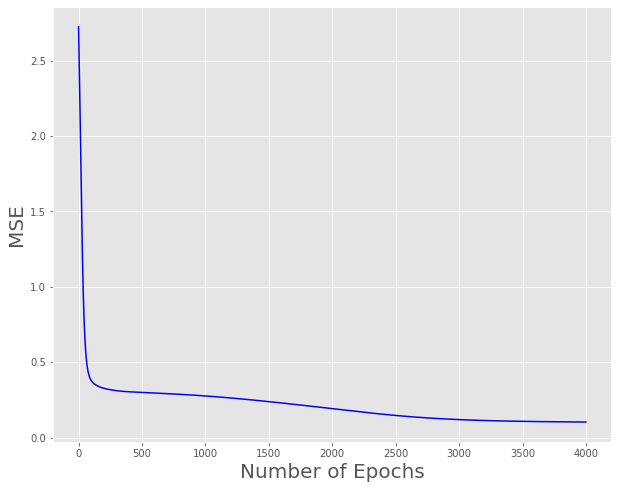

In [27]:
plt.figure(figsize=(10,8))
fig1 = plt.figure(1)
ax = fig1.gca()
ax = plt.plot(range(epochMax),MSEAv,'b')
plt.xlabel('Number of Epochs', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.show()

In [28]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
XN = dg.values
XP = df.values
datamisclass = data
Ymisclass = MLP(datamisclass[:,0:2].T,Wh8,Wo8)   #pick one of the weights to classify new dataset
H = np.multiply(datamisclass[:,2],Ymisclass)
datamisclass[:,2] = H
misclass = datamisclass[datamisclass[:,2] <0]

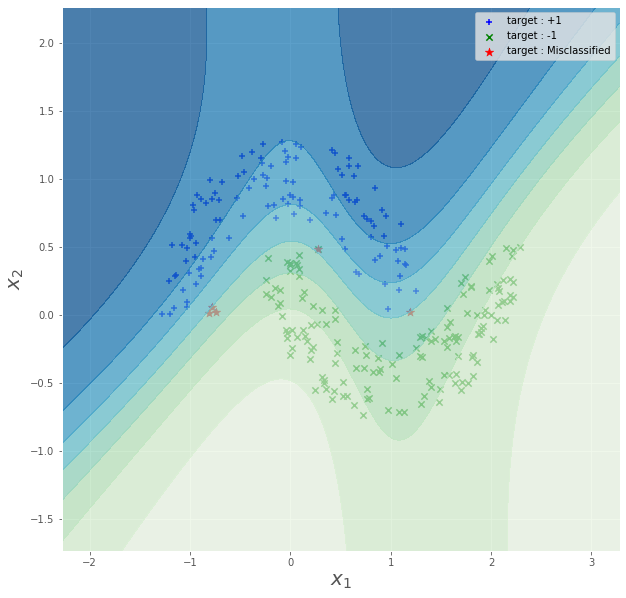

In [30]:
plt.figure(figsize=(10,10))
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.scatter(XP[:,0],XP[:,1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(XN[:,0],XN[:,1],marker='x', c='g',label = "target : -1", s=40)
plt.scatter(misclass[:,0],misclass[:,1],marker='*', c='r',label = "target : Misclassified", s=80)
plt.legend()

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

xxr = xx.ravel() 
yyr = yy.ravel() 
ones = np.ones(len(xxr))

# Predict the score
Xvals  = np.c_[ones, xxr, yyr]
Y = MLP(Xvals[:,1:3].T,Wh8,Wo8)    #pick the weights you have selected in last section
# Plot contour plot
scores = Y.reshape(xx.shape)
plt.contourf(xx, yy, scores, alpha=0.7,  cmap='GnBu')
# show the plot
plt.show()
plt.close()